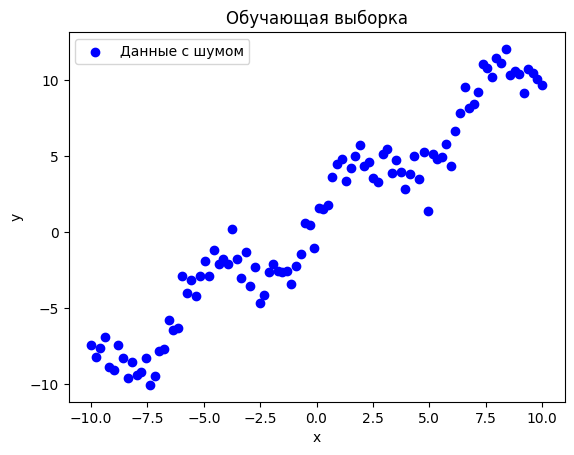

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры генерации данных
np.random.seed(42)  # Для воспроизводимости результатов
n_samples = 100     # Количество точек
x = np.linspace(-10, 10, n_samples)  # Диапазон значений x
noise = np.random.normal(0, 1, n_samples)  # Шум с N(0, 1)

# Функция y(x)
theta1, theta2, theta3 = 1, 2, 1
y = theta1 * x + theta2 * np.sin(x) + theta3 + noise

# Визуализируем данные
plt.scatter(x, y, label="Данные с шумом", color="blue")
plt.title("Обучающая выборка")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

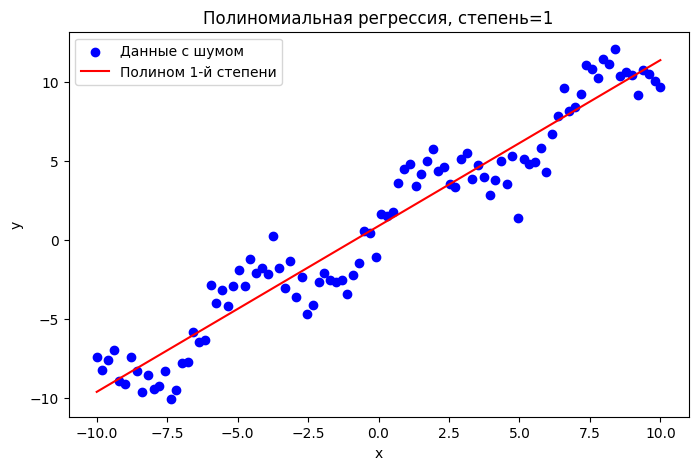

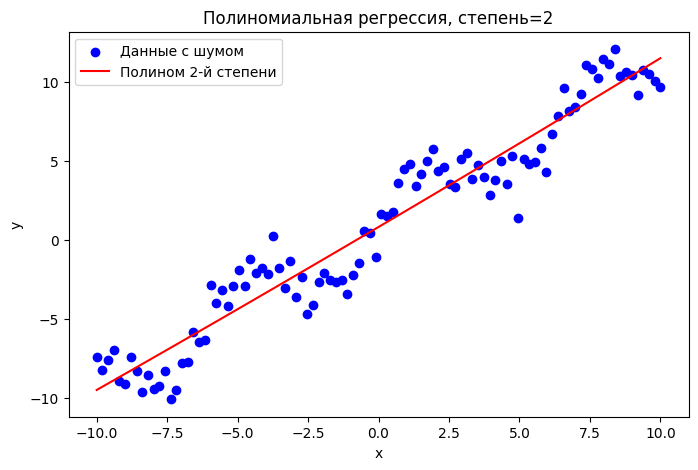

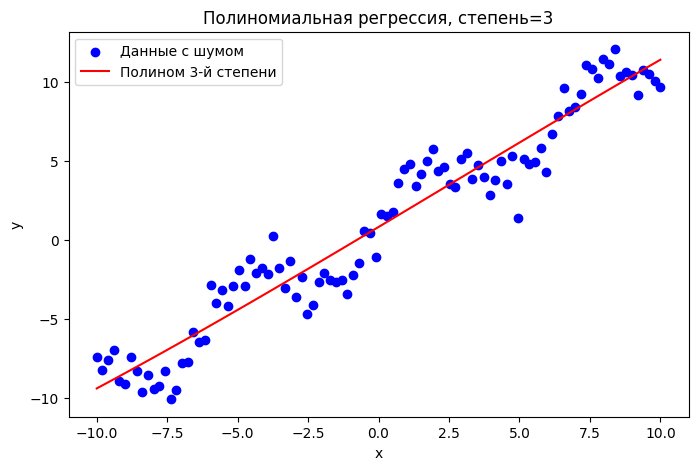

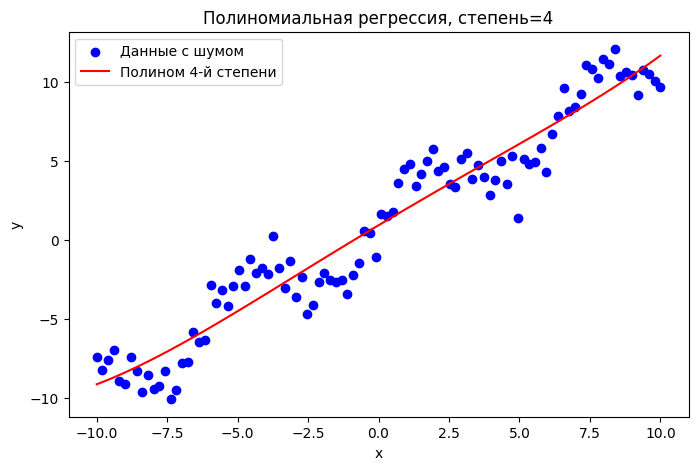

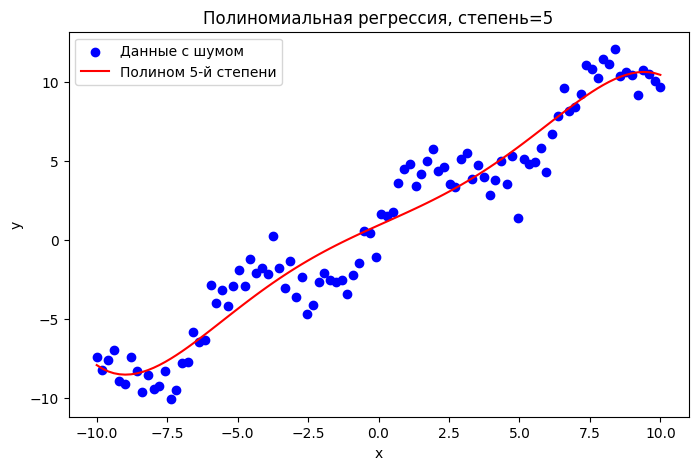

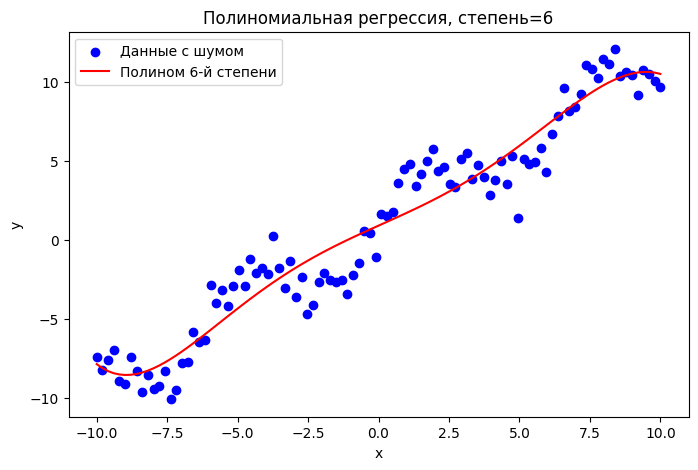

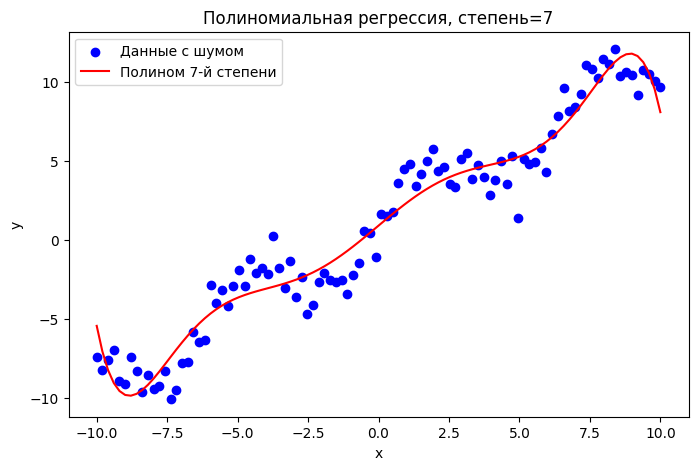

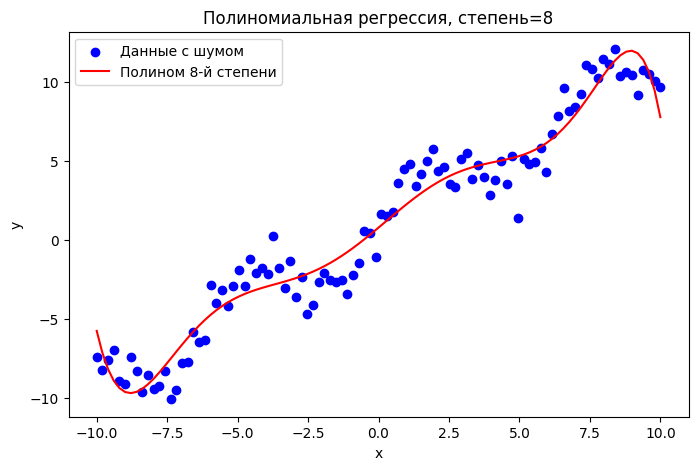

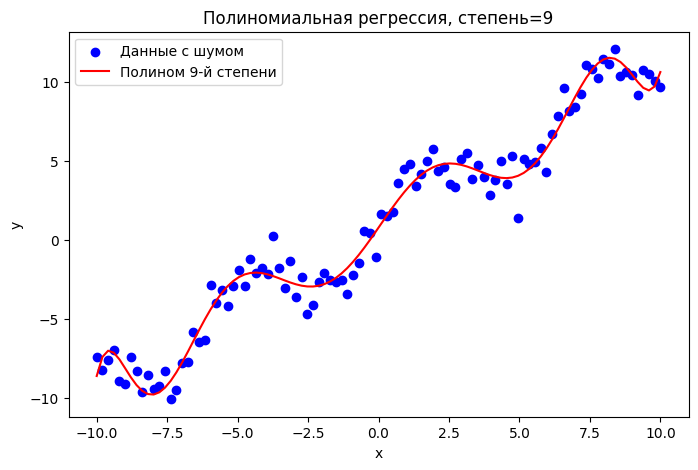

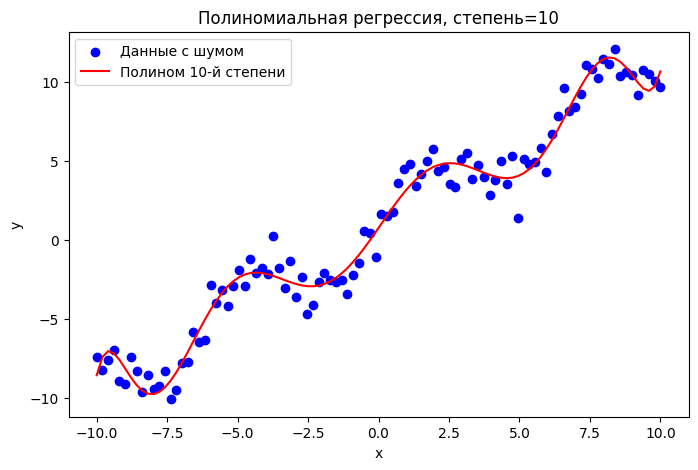

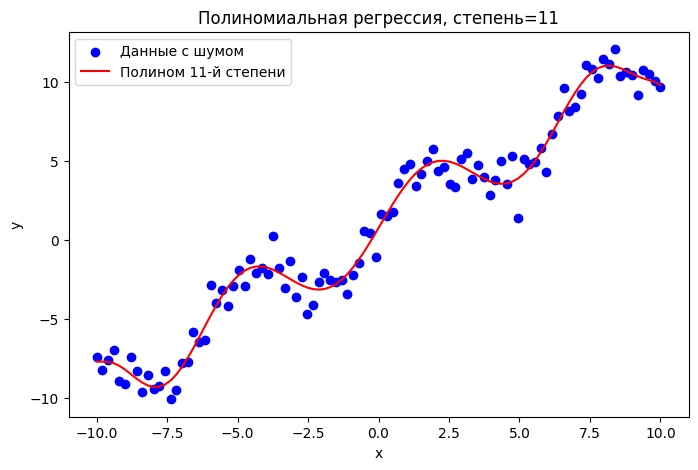

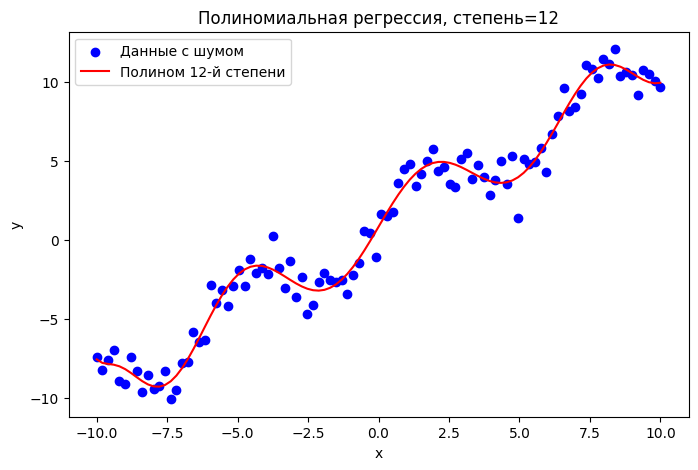

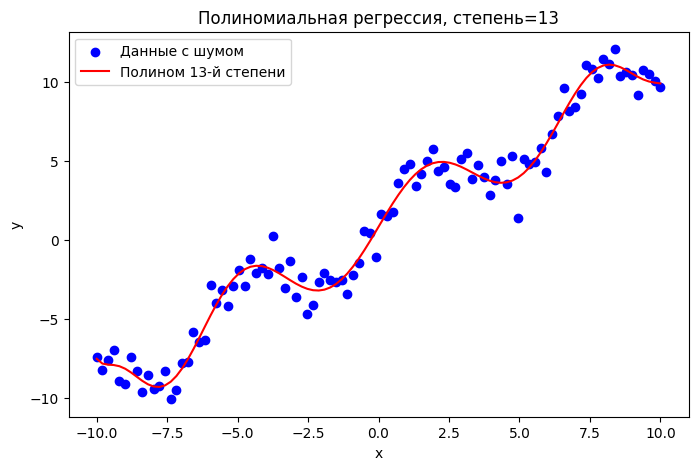

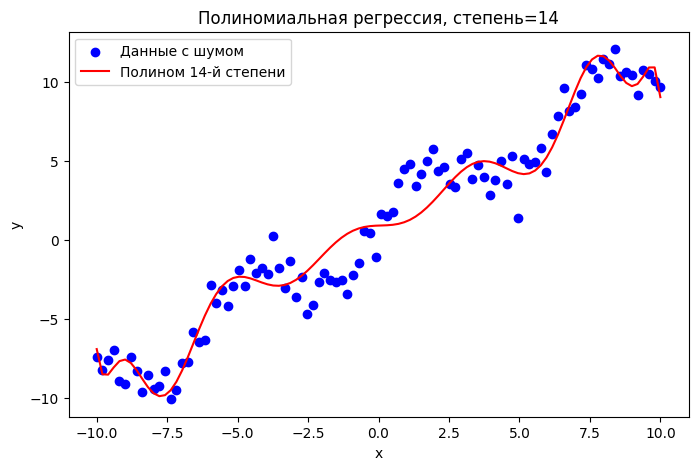

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Создаем объект PolynomialFeatures для разных степеней полинома
degrees = np.arange(1, 15) # Проверяем полиномы от 1 до 6 степени
mse_values = []               # Список для хранения MSE для каждой степени

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x.reshape(-1, 1))  # Преобразуем x в полиномиальные признаки
    
    # Обучаем модель линейной регрессии
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Предсказываем значения
    y_pred = model.predict(X_poly)
    
    # Вычисляем среднеквадратическую ошибку (MSE)
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)
    
    # Визуализируем предсказания для текущей степени
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label="Данные с шумом", color="blue")
    plt.plot(x, y_pred, label=f"Полином {degree}-й степени", color="red")
    plt.title(f"Полиномиальная регрессия, степень={degree}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

Коэффициенты полинома степени 13:
[ 0.00000000e+00  3.01160435e+00 -3.46700982e-03 -2.94373354e-01
  3.36052762e-03  1.21643618e-02 -2.29316163e-04 -2.00520152e-04
  5.43200055e-06  1.31504812e-06 -5.34736604e-08 -1.25377365e-09
  1.87955980e-10 -1.27939552e-11]
Свободный член: 0.8452923183226378



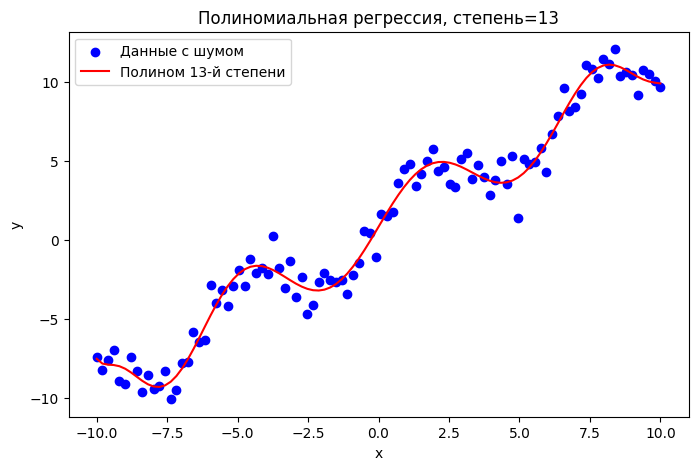

Коэффициенты полинома степени 18:
[ 0.00000000e+00 -1.27295616e-10  1.24165027e-09  6.34868107e-10
  2.69678598e-08  1.55341515e-08  4.32686205e-07  3.14027439e-07
  4.17736188e-06  3.99303729e-06 -3.64323389e-07 -1.75549771e-07
  1.15917828e-08  2.95594943e-09 -1.73854970e-10 -2.24070814e-11
  1.25006044e-12  6.41533785e-14 -3.48170753e-15]
Свободный член: 0.8981194835168564



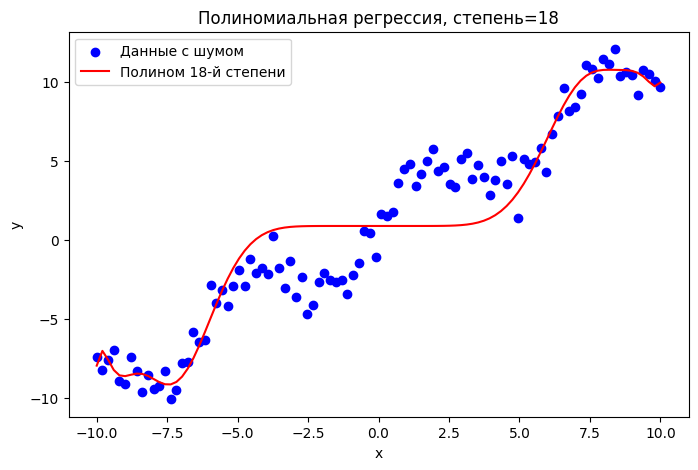

Коэффициенты полинома степени 23:
[ 0.00000000e+00  1.13716432e-17 -1.85421534e-16  2.86860475e-19
 -1.38284328e-18  3.03230380e-18 -5.81603916e-17  1.15060134e-16
 -2.05911278e-15  4.03910275e-15 -6.33897854e-14  1.24528542e-13
 -1.54381954e-12  3.04971902e-12 -2.29274676e-11  4.56222115e-11
  1.12212308e-12 -2.06977353e-12 -2.03511760e-14  3.52177641e-14
  1.62503579e-16 -2.66184268e-16 -4.82602927e-19  7.53403816e-19]
Свободный член: 0.908700995813907



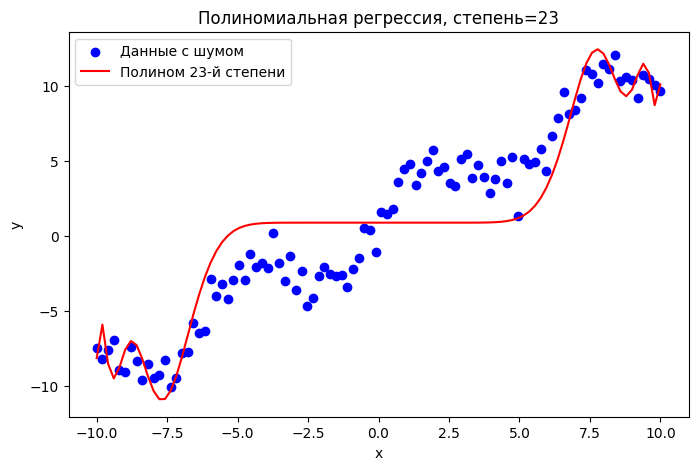

In [18]:
def train_and_print_coefficients(degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x.reshape(-1, 1))  # Преобразуем x в полиномиальные признаки
    
    # Обучаем модель линейной регрессии
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Предсказываем значения
    y_pred = model.predict(X_poly)
    
    # Выводим коэффициенты полинома
    print(f"Коэффициенты полинома степени {degree}:")
    print(model.coef_)
    print(f"Свободный член: {model.intercept_}\n")
    
    # Визуализируем предсказания для текущей степени
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label="Данные с шумом", color="blue")
    plt.plot(x, y_pred, label=f"Полином {degree}-й степени", color="red")
    plt.title(f"Полиномиальная регрессия, степень={degree}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

# Оптимальная степень из лабораторной работы 1
optimal_degree = 13
train_and_print_coefficients(optimal_degree)

# Полиномы большей степени (+5 и +10)
train_and_print_coefficients(optimal_degree + 5)
train_and_print_coefficients(optimal_degree + 10)

Коэффициенты полинома степени 13 (ridge, alpha=0.1):
[ 0.          5.84208113  0.04189051 -2.81559613 -0.7828968   7.31530046
  0.587735    0.53749255  0.789507   -4.26186371  0.1553778  -3.22599748
 -0.73298547  2.39173301]
Свободный член: 0.8961534826059058



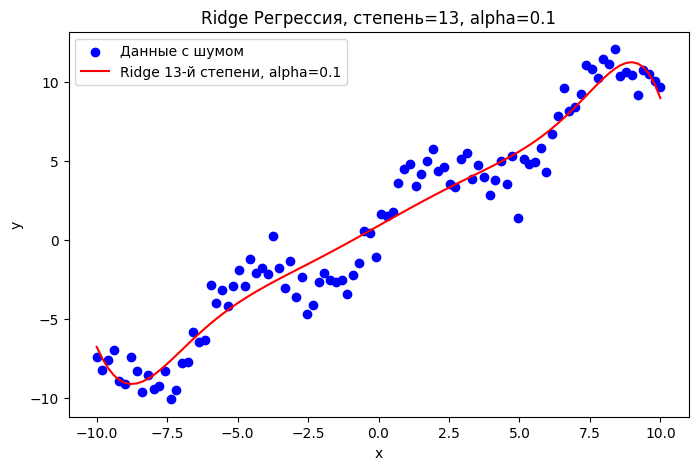

Коэффициенты полинома степени 13 (ridge, alpha=1):
[ 0.          4.95132556 -0.15259535  1.29695645 -0.02491272  1.43018023
  0.20546989  0.18737794  0.1957928  -0.70810775  0.03246229 -0.89975785
 -0.1877811  -0.53614271]
Свободный член: 0.8961534826059068



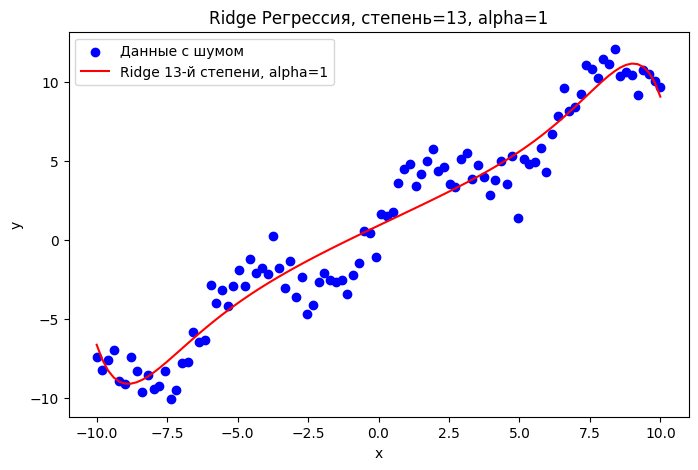

Коэффициенты полинома степени 13 (ridge, alpha=10):
[ 0.00000000e+00  4.01010172e+00 -6.45607788e-02  1.96040428e+00
  1.09302041e-02  9.51641568e-01  5.38974367e-02  2.02000388e-01
  5.37751259e-02 -2.92435545e-01  3.04145452e-02 -5.85618253e-01
 -1.49810545e-03 -7.40854244e-01]
Свободный член: 0.8961534826059068



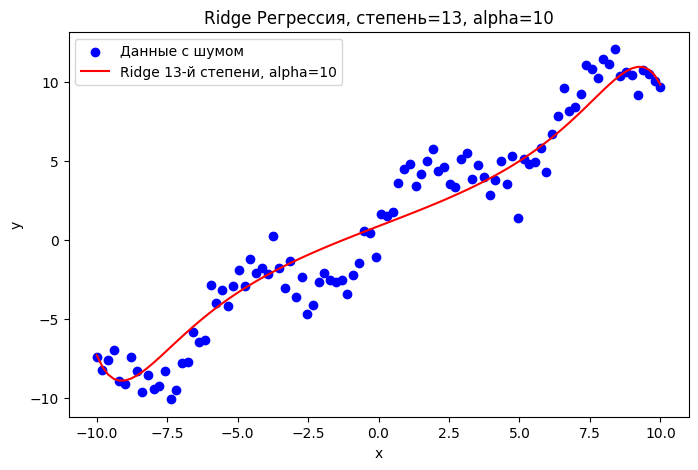

Коэффициенты полинома степени 13 (ridge, alpha=100):
[ 0.          1.95135386 -0.00712908  1.25418636  0.00858656  0.77271091
  0.01765977  0.43423029  0.02045876  0.19848601  0.01980332  0.03366811
  0.01761731 -0.08289707]
Свободный член: 0.8961534826059063



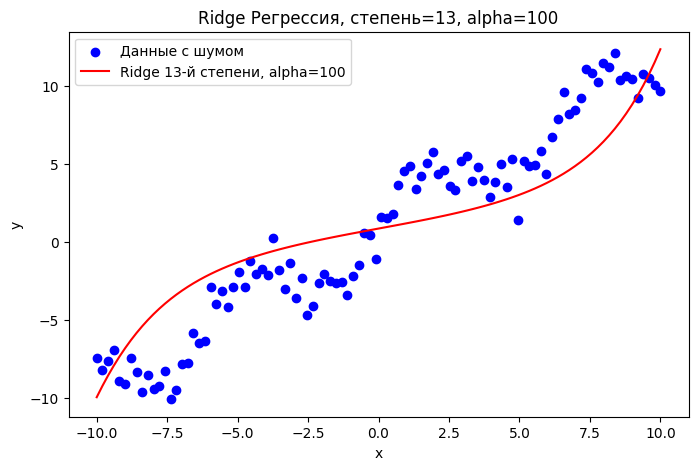

Коэффициенты полинома степени 18 (ridge, alpha=0.1):
[ 0.          5.98749423  0.08056041 -3.96931626 -0.7621582   8.23273234
  0.36917682  2.62104625  0.62136151 -3.1462339   0.32367894 -4.92967774
 -0.03728445 -3.3890733  -0.2401968   0.076601   -0.23883654  4.36107133
 -0.06364921]
Свободный член: 0.8961534826059058



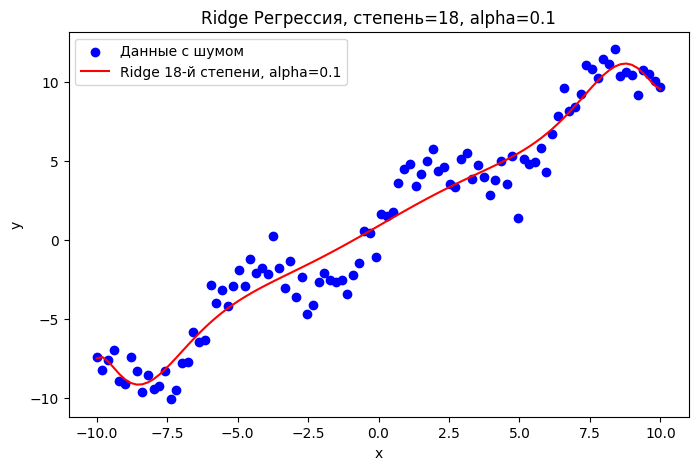

Коэффициенты полинома степени 18 (ridge, alpha=1):
[ 0.          4.92779934 -0.12661595  1.32230407 -0.10231309  1.51205064
  0.13418215  0.24544873  0.20435514 -0.73216464  0.1582333  -1.03747941
  0.06961469 -0.80072339 -0.02142532 -0.22650905 -0.09919522  0.52202019
 -0.1603269 ]
Свободный член: 0.8961534826059067



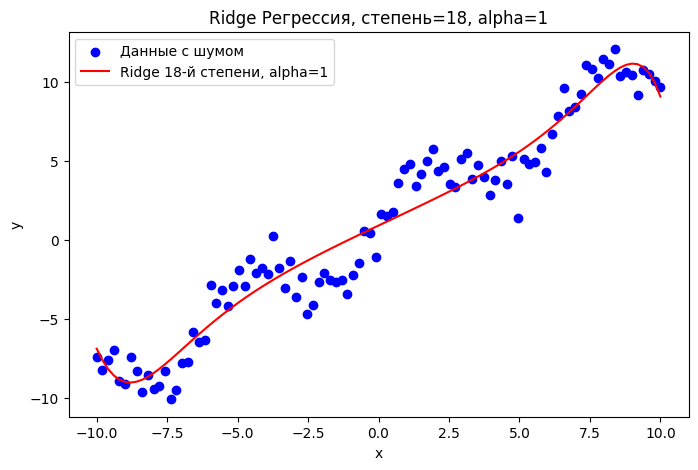

Коэффициенты полинома степени 18 (ridge, alpha=10):
[ 0.00000000e+00  3.97942598e+00 -7.16588578e-02  1.89463475e+00
  6.07968911e-03  9.43884874e-01  5.68704272e-02  2.81216674e-01
  6.60884979e-02 -1.22909561e-01  5.19320862e-02 -3.31900276e-01
  2.84681927e-02 -4.12061141e-01  3.06107698e-03 -4.13383942e-01
 -2.10476927e-02 -3.69336335e-01 -4.27140110e-02]
Свободный член: 0.8961534826059068



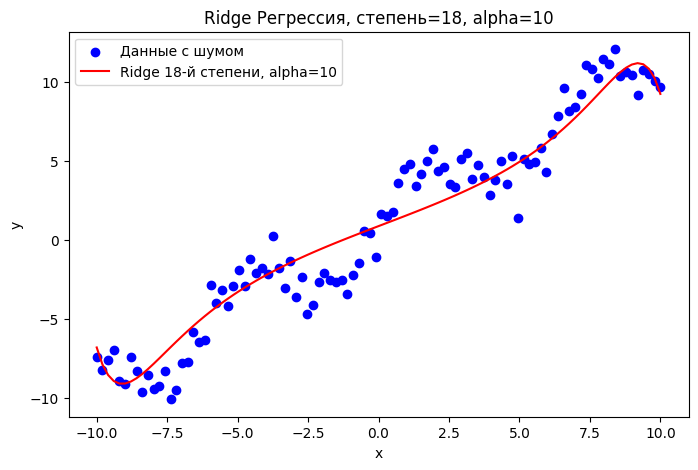

Коэффициенты полинома степени 18 (ridge, alpha=100):
[ 0.          1.94951853 -0.00762065  1.26609988  0.0068851   0.79754893
  0.01496543  0.46962484  0.01698791  0.24225664  0.01573025  0.08404569
  0.0130767  -0.02730446  0.01000761 -0.1067897   0.00697488 -0.16434704
  0.00416068]
Свободный член: 0.8961534826059063



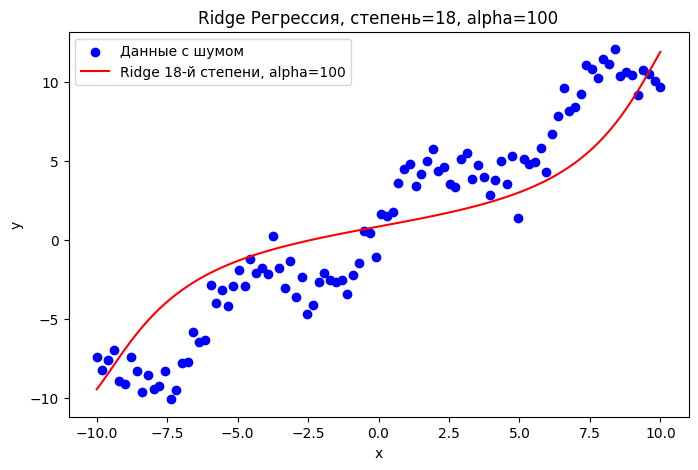

Коэффициенты полинома степени 23 (ridge, alpha=0.1):
[ 0.00000000e+00  6.15416970e+00  8.85599903e-02 -4.56734221e+00
 -7.98144784e-01  7.83148286e+00  3.67342981e-01  3.43332592e+00
  6.62126488e-01 -1.61439219e+00  3.80630008e-01 -3.69689995e+00
  1.34213541e-03 -3.46157573e+00 -2.51045445e-01 -2.10860433e+00
 -3.23436067e-01 -5.15157527e-01 -2.39219938e-01  8.20284458e-01
 -4.53615660e-02  1.66775153e+00  2.11652437e-01  1.95870636e+00]
Свободный член: 0.8961534826059062



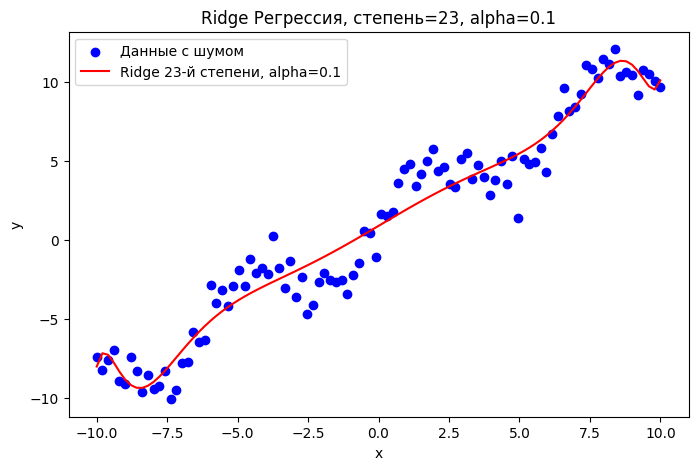

Коэффициенты полинома степени 23 (ridge, alpha=1):
[ 0.00000000e+00  4.88395629e+00 -1.16545524e-01  1.25706174e+00
 -1.09563846e-01  1.69214233e+00  1.12426793e-01  5.24841003e-01
  1.82717058e-01 -5.29193985e-01  1.49317899e-01 -1.04091814e+00
  8.19151126e-02 -1.09231167e+00  1.70766160e-02 -8.51136940e-01
 -3.20295375e-02 -4.55088454e-01 -6.37283082e-02  3.60487311e-03
 -8.08804491e-02  4.69035090e-01 -8.74804665e-02  9.09958502e-01]
Свободный член: 0.8961534826059069



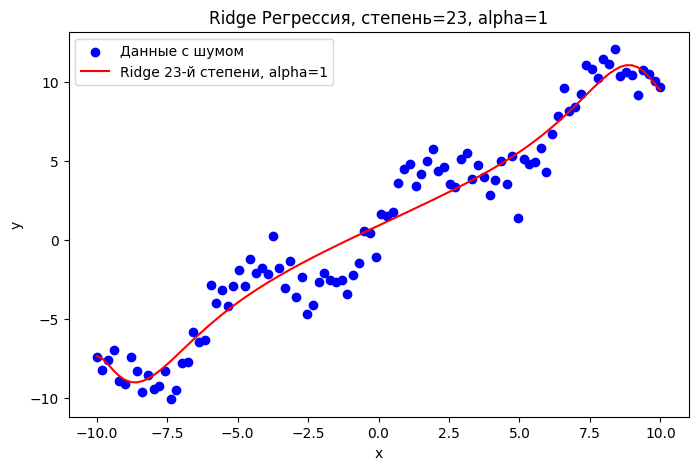

Коэффициенты полинома степени 23 (ridge, alpha=10):
[ 0.00000000e+00  3.97707591e+00 -7.44577678e-02  1.87438529e+00
  7.76468416e-04  9.28660202e-01  5.36868930e-02  2.82042829e-01
  6.72191757e-02 -1.01881830e-01  5.82252199e-02 -2.89884800e-01
  4.00835259e-02 -3.49848198e-01  1.98181930e-02 -3.32448838e-01
  5.13259223e-04 -2.71394116e-01 -1.67486794e-02 -1.87941640e-01
 -3.17997684e-02 -9.50782969e-02 -4.48377447e-02 -5.21558375e-04]
Свободный член: 0.8961534826059068



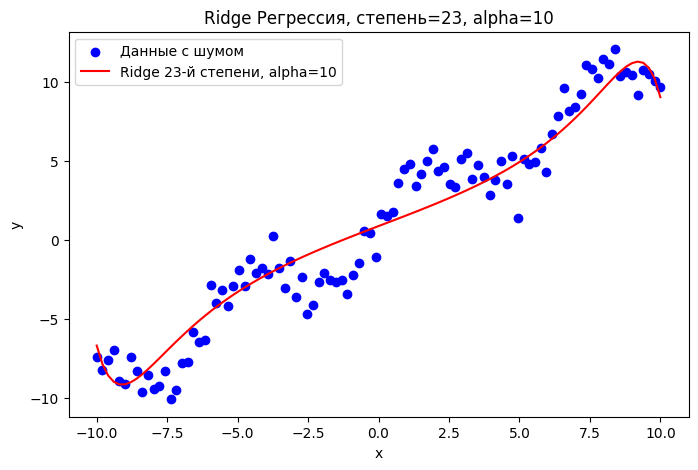

Коэффициенты полинома степени 23 (ridge, alpha=100):
[ 0.00000000e+00  1.94133298e+00 -7.62082904e-03  1.27042404e+00
  6.86095310e-03  8.17076824e-01  1.49195741e-02  5.03257745e-01
  1.69239359e-02  2.88143979e-01  1.56514758e-02  1.40341092e-01
  1.29859109e-02  3.77576014e-02  9.90708886e-03 -3.43623326e-02
  6.86645417e-03 -8.57320328e-02  4.04581730e-03 -1.22765174e-01
  1.49859397e-03 -1.49743050e-01 -7.78332736e-04 -1.69564159e-01]
Свободный член: 0.8961534826059063



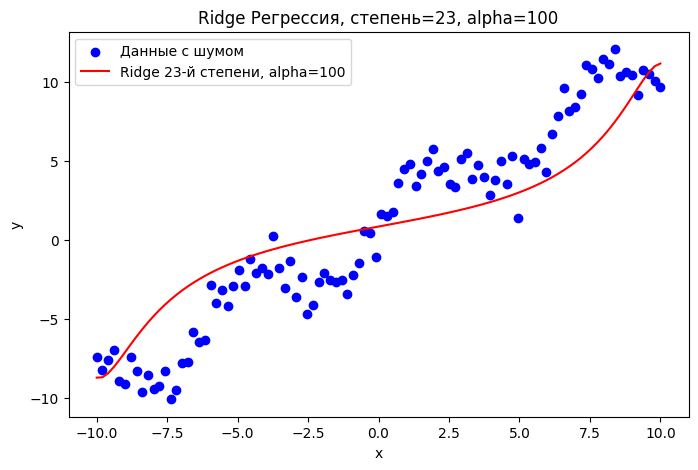

Коэффициенты полинома степени 13 (lasso, alpha=0.1):
[ 0.          5.71763346  0.          0.65665075  0.          0.
  0.          0.          0.         -0.          0.         -0.
  0.         -0.49987846]
Свободный член: 0.8961534826059061



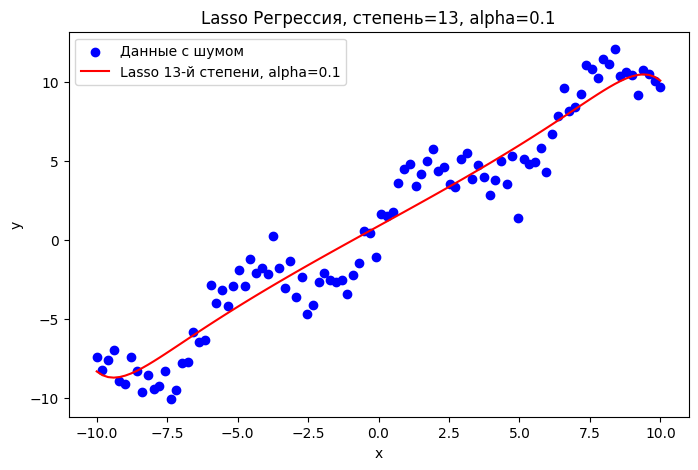

Коэффициенты полинома степени 13 (lasso, alpha=1):
[0.         5.11847838 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
Свободный член: 0.896153482605906



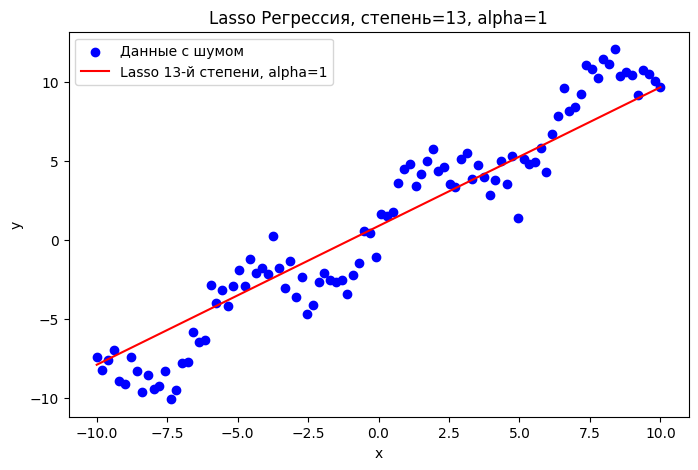

Коэффициенты полинома степени 13 (lasso, alpha=10):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Свободный член: 0.8961534826059059



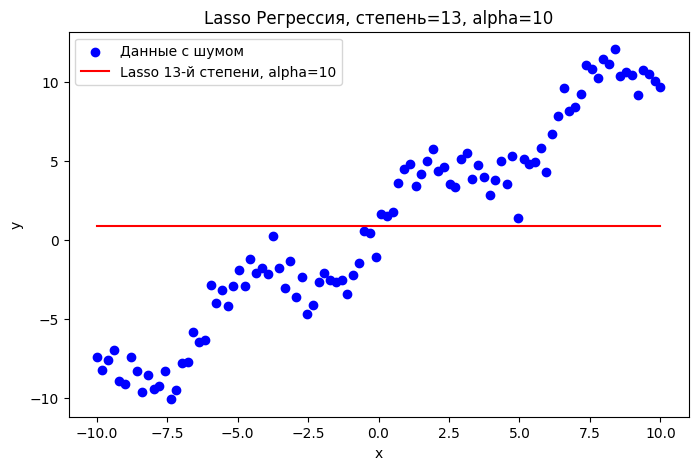

Коэффициенты полинома степени 13 (lasso, alpha=100):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Свободный член: 0.8961534826059059



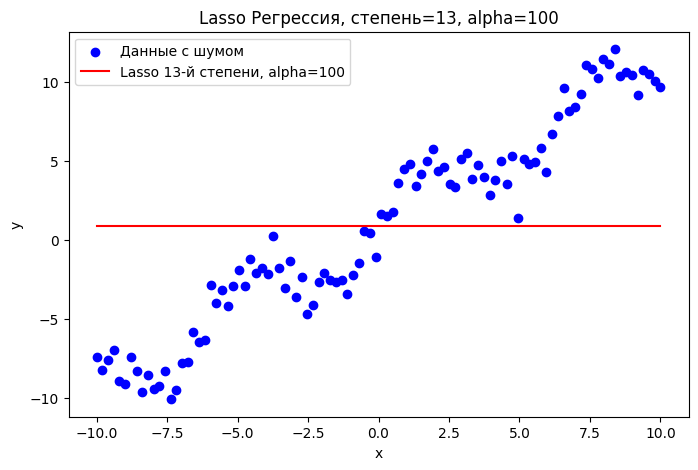

Коэффициенты полинома степени 18 (lasso, alpha=0.1):
[ 0.          5.7034634   0.          0.63800952  0.          0.
  0.          0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.49882444
  0.        ]
Свободный член: 0.8961534826059061



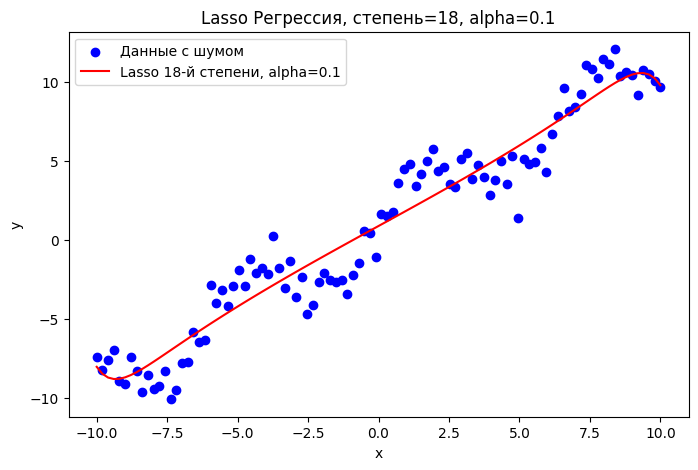

Коэффициенты полинома степени 18 (lasso, alpha=1):
[0.         5.11847838 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
Свободный член: 0.896153482605906



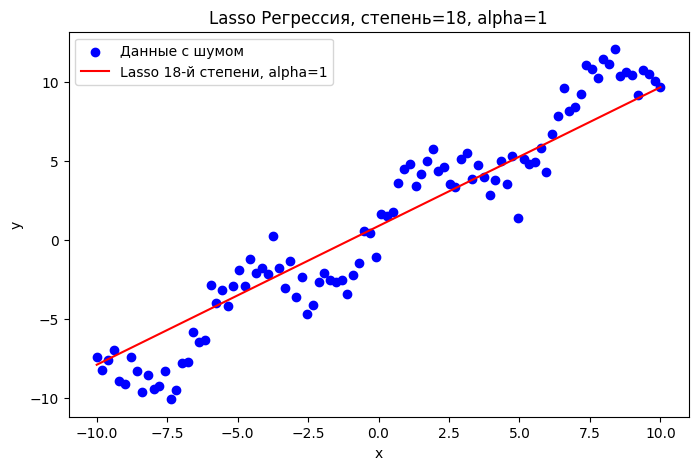

Коэффициенты полинома степени 18 (lasso, alpha=10):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Свободный член: 0.8961534826059059



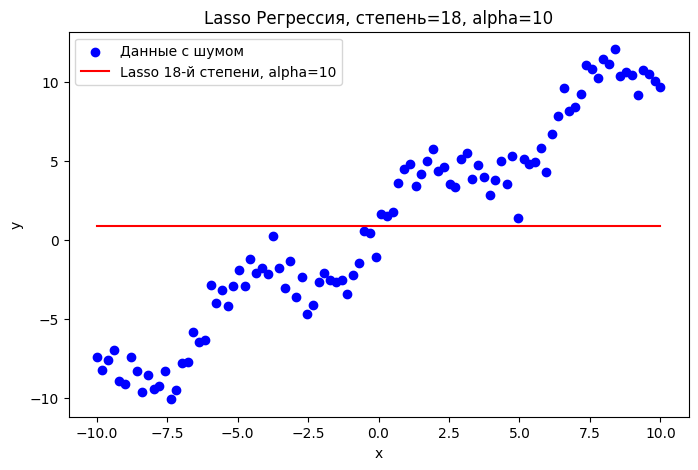

Коэффициенты полинома степени 18 (lasso, alpha=100):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Свободный член: 0.8961534826059059



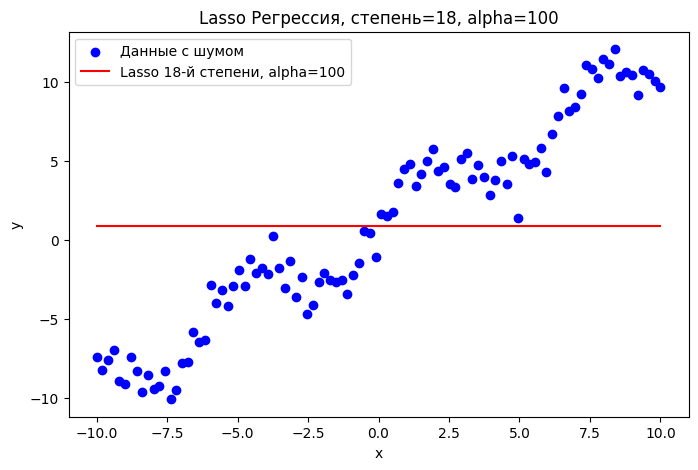

Коэффициенты полинома степени 23 (lasso, alpha=0.1):
[ 0.          5.72925542  0.          0.58191735  0.          0.
  0.          0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.42731608  0.         -0.04633922  0.         -0.        ]
Свободный член: 0.8961534826059061



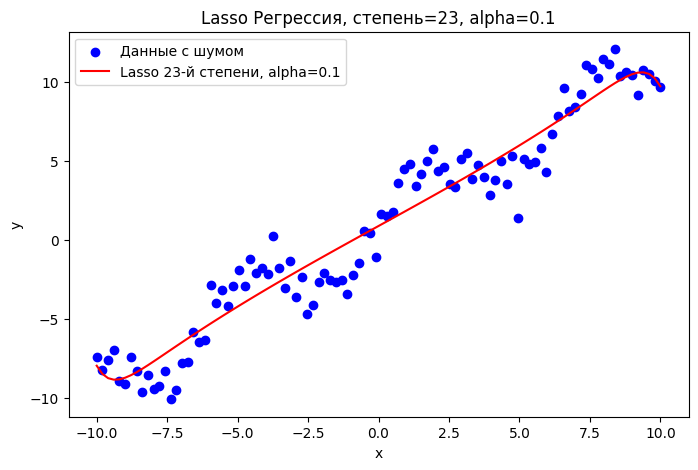

Коэффициенты полинома степени 23 (lasso, alpha=1):
[0.         5.11847838 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
Свободный член: 0.896153482605906



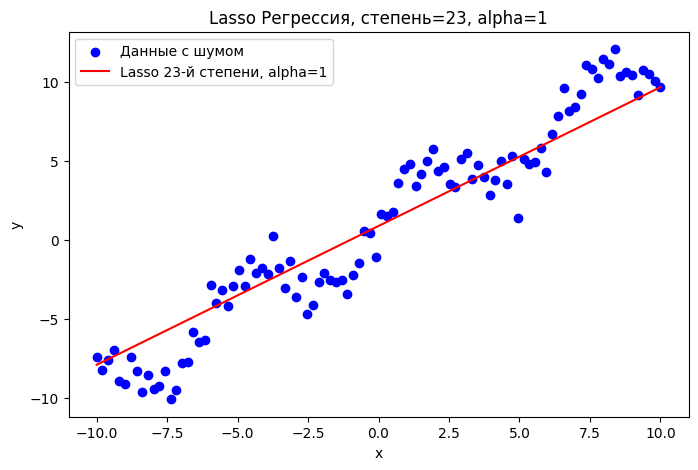

Коэффициенты полинома степени 23 (lasso, alpha=10):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Свободный член: 0.8961534826059059



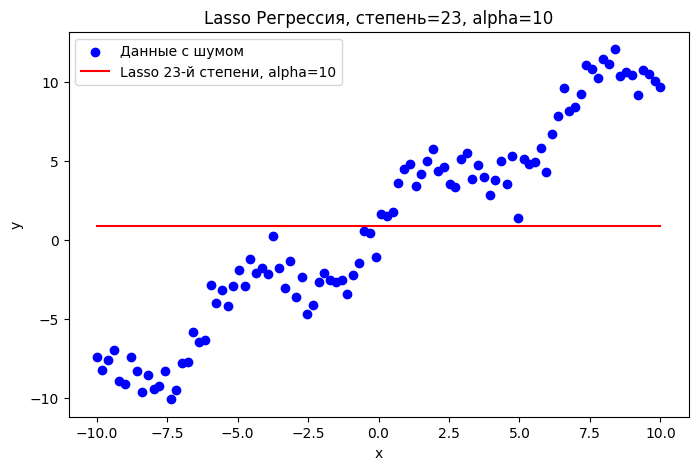

Коэффициенты полинома степени 23 (lasso, alpha=100):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Свободный член: 0.8961534826059059



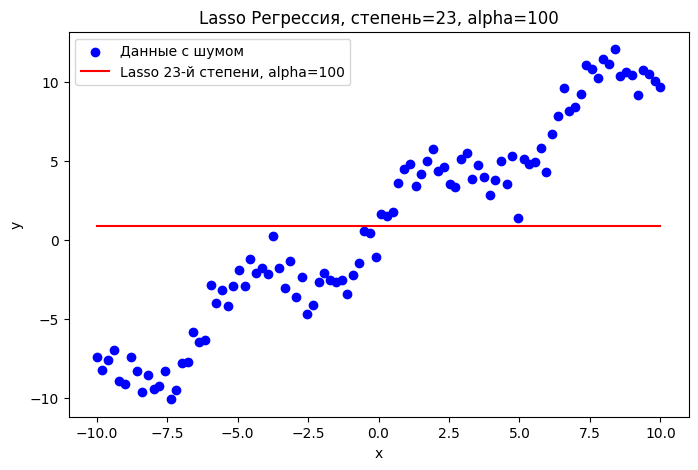

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

def train_and_print_coefficients(degree, alpha_values, model_type):
    poly = PolynomialFeatures(degree=degree)
    scaler = StandardScaler()
    
    for alpha in alpha_values:
        if model_type == 'ridge':
            model = Ridge(alpha=alpha)
        elif model_type == 'lasso':
            model = Lasso(alpha=alpha, max_iter=10000)  # Увеличиваем max_iter для сходимости Lasso
        
        # Создаем конвейер для нормализации и модели
        pipeline = make_pipeline(poly, scaler, model)
        
        # Обучаем модель
        pipeline.fit(x.reshape(-1, 1), y)
        
        # Получаем коэффициенты модели
        coef = pipeline.named_steps[model_type].coef_
        intercept = pipeline.named_steps[model_type].intercept_
        
        # Выводим коэффициенты полинома
        print(f"Коэффициенты полинома степени {degree} ({model_type}, alpha={alpha}):")
        print(coef)
        print(f"Свободный член: {intercept}\n")
        
        # Предсказываем значения
        y_pred = pipeline.predict(x.reshape(-1, 1))
        
        # Визуализируем предсказания для текущей степени и alpha
        plt.figure(figsize=(8, 5))
        plt.scatter(x, y, label="Данные с шумом", color="blue")
        plt.plot(x, y_pred, label=f"{model_type.capitalize()} {degree}-й степени, alpha={alpha}", color="red")
        plt.title(f"{model_type.capitalize()} Регрессия, степень={degree}, alpha={alpha}")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.show()

# Оптимальная степень из лабораторной работы 1 пункт 1
optimal_degree = 13
# Полиномы большей степени (+5 и +10)
degrees = [optimal_degree, optimal_degree + 5, optimal_degree + 10]
# Значения параметра регуляризации
alpha_values = [0.1, 1, 10, 100]

# Применяем Ridge регрессию
for degree in degrees:
    train_and_print_coefficients(degree, alpha_values, 'ridge')

# Применяем Lasso регрессию
for degree in degrees:
    train_and_print_coefficients(degree, alpha_values, 'lasso')

Коэффициенты полинома степени 13 (ridge, alpha=0.1):
[ 0.          5.89613353 -0.28549213 -2.1293656   0.04910434  5.96436139
  0.25048749  0.53846767  0.14394732 -3.42746071 -0.03846008 -2.72701598
 -0.0406644   1.69387712]
Свободный член: 1.2215557308105898

MSE на обучающей выборке: 2.237950307600263
MSE на контрольной выборке: 2.2141426380142546



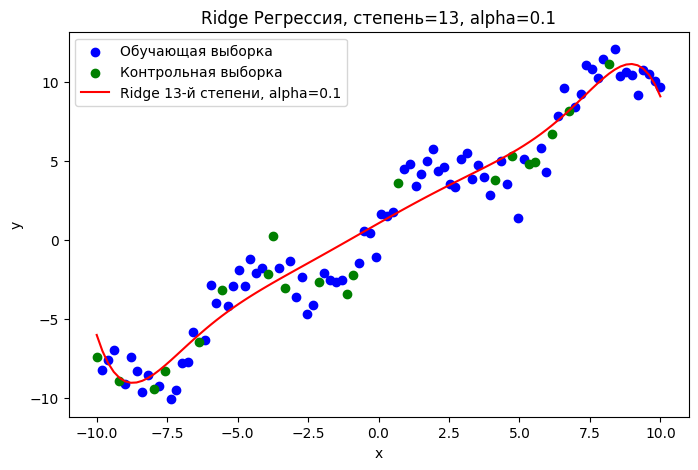

Коэффициенты полинома степени 13 (ridge, alpha=1):
[ 0.          5.06131455 -0.23693189  1.37331728  0.04701705  1.22622828
  0.13114479  0.13648454  0.10380384 -0.63673736  0.04221028 -0.83444984
 -0.00668841 -0.58173335]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.4040720021727973
MSE на контрольной выборке: 2.321040655741605



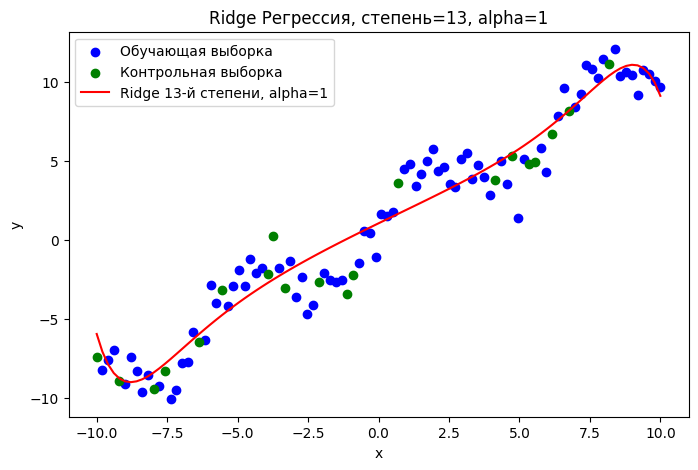

Коэффициенты полинома степени 13 (ridge, alpha=10):
[ 0.          3.93844603 -0.12874419  1.91952511  0.02257617  0.92762835
  0.06645797  0.21702041  0.05771365 -0.25384409  0.0290686  -0.54223073
 -0.00439377 -0.70587897]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.953782269640821
MSE на контрольной выборке: 2.4166060659329105



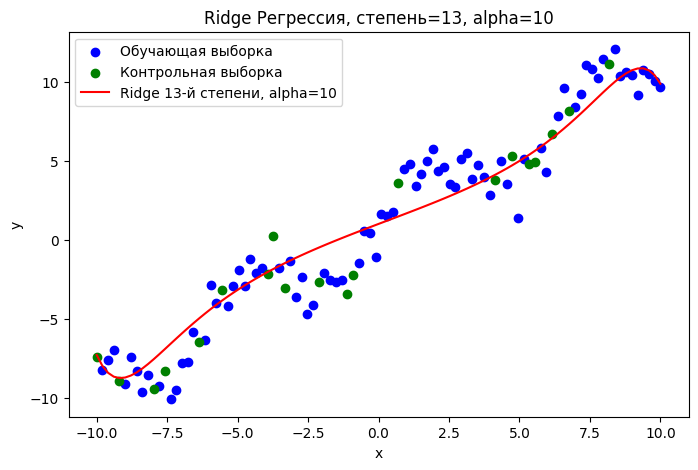

Коэффициенты полинома степени 13 (ridge, alpha=100):
[ 0.          1.73101196 -0.0177732   1.13534564  0.01222021  0.73673772
  0.01349612  0.45592938  0.00231325  0.25798309 -0.01276642  0.11750264
 -0.02832481  0.01647757]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 10.026042165567741
MSE на контрольной выборке: 9.907515052171426



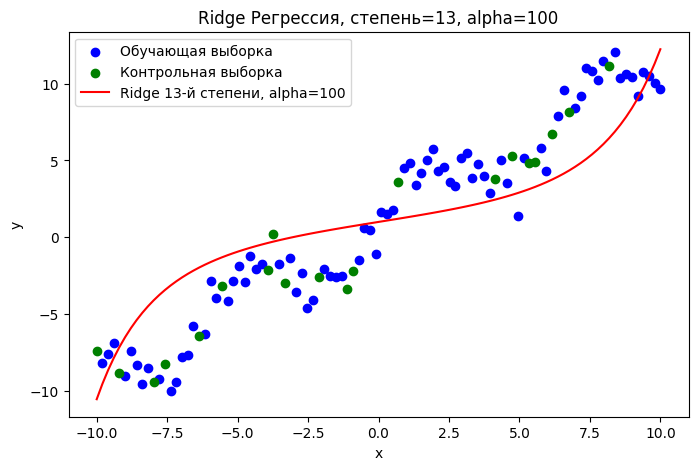

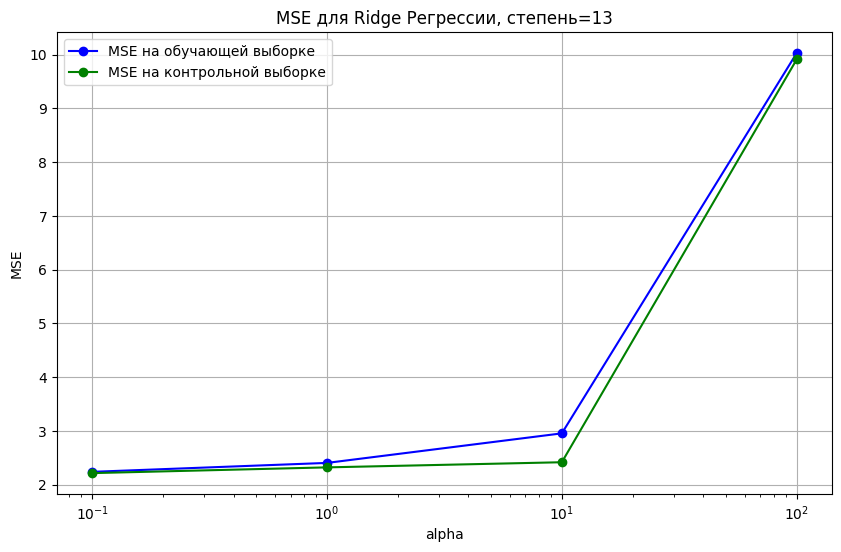

Коэффициенты полинома степени 18 (ridge, alpha=0.1):
[ 0.          5.95302643 -0.2342865  -3.00090553 -0.18679912  6.95689686
  0.21680172  2.20914365  0.37396907 -2.78397497  0.27131822 -4.39523502
  0.0767707  -3.06983145 -0.09270128  0.04331827 -0.19391856  3.99409601
 -0.22864102]
Свободный член: 1.22155573081059

MSE на обучающей выборке: 2.092441259746698
MSE на контрольной выборке: 2.0377721418290684



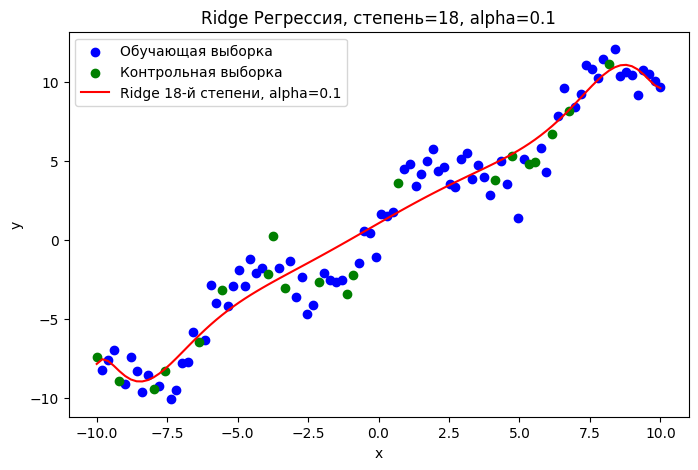

Коэффициенты полинома степени 18 (ridge, alpha=1):
[ 0.00000000e+00  5.04824982e+00 -2.41874811e-01  1.39245452e+00
  4.48892421e-02  1.26887824e+00  1.38934050e-01  1.63942530e-01
  1.17326181e-01 -6.50057198e-01  5.50395165e-02 -9.01438013e-01
 -4.78866736e-04 -7.07094061e-01 -2.81887353e-02 -2.36570770e-01
 -2.33641861e-02  3.76232523e-01  1.08734728e-02]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.3942801432439644
MSE на контрольной выборке: 2.297107335252712



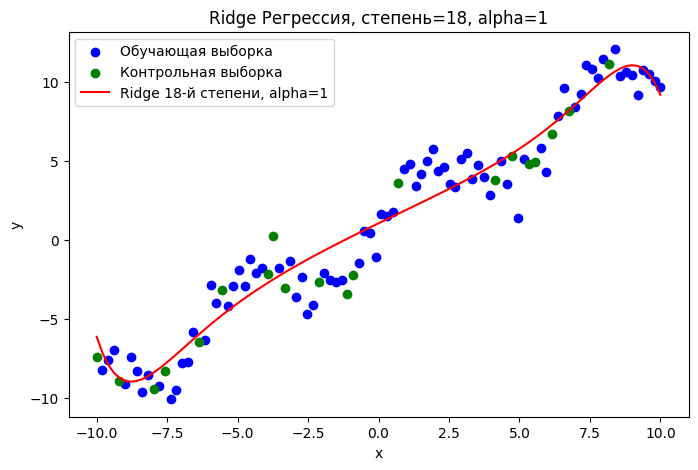

Коэффициенты полинома степени 18 (ridge, alpha=10):
[ 0.00000000e+00  3.89595021e+00 -1.37265164e-01  1.86737586e+00
  6.85434144e-03  9.39948145e-01  5.44405820e-02  3.11568235e-01
  5.65659241e-02 -7.82982487e-02  4.33124209e-02 -2.93193891e-01
  2.79600158e-02 -3.92480955e-01  1.54283168e-02 -4.19870637e-01
  6.94615999e-03 -4.04540229e-01  2.27780485e-03]
Свободный член: 1.22155573081059

MSE на обучающей выборке: 2.961771659143672
MSE на контрольной выборке: 2.4469359297211115



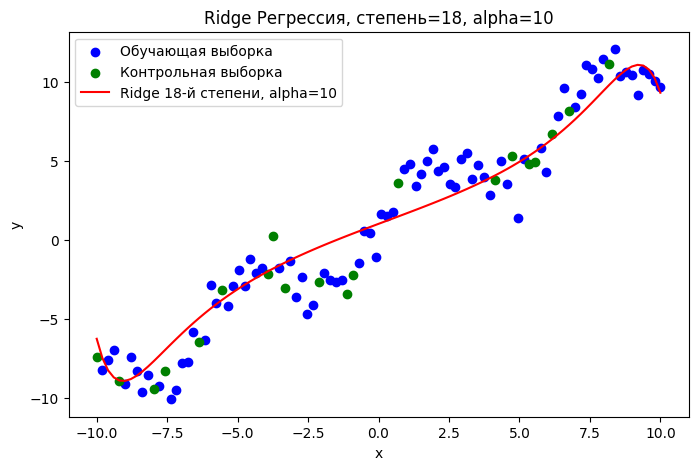

Коэффициенты полинома степени 18 (ridge, alpha=100):
[ 0.          1.73103655 -0.01549619  1.14093514  0.01978127  0.74755167
  0.02564134  0.47113078  0.01825786  0.27680195  0.00631408  0.13930556
 -0.00664168  0.04075586 -0.01931109 -0.03095238 -0.03128628 -0.08390454
 -0.04248988]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 9.916044501764727
MSE на контрольной выборке: 9.830062215442597



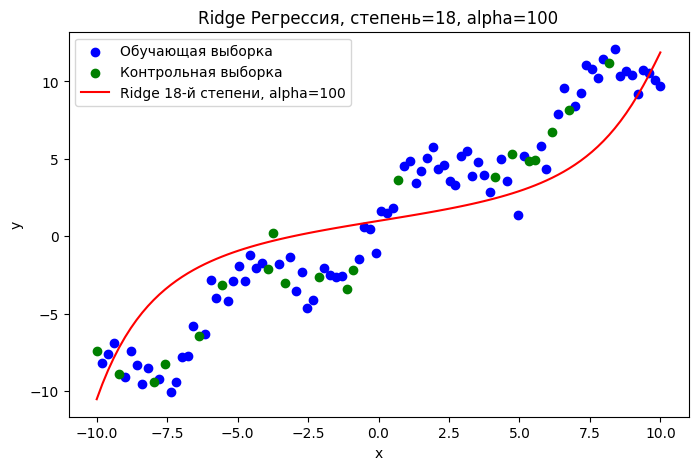

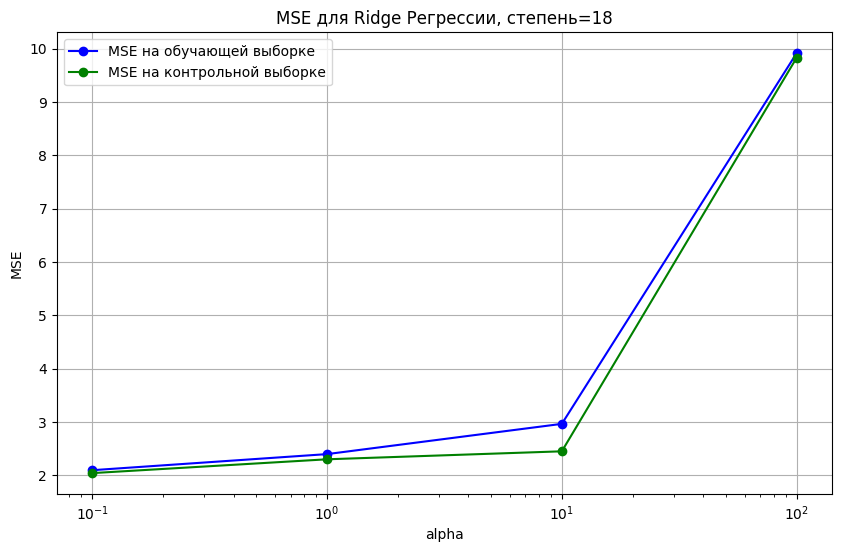

Коэффициенты полинома степени 23 (ridge, alpha=0.1):
[ 0.          6.10777686 -0.16765998 -3.76562457 -0.24226096  6.87124951
 -0.02963608  3.27171642  0.21939387 -1.28230185  0.35653514 -3.42287543
  0.39424984 -3.47667224  0.35077388 -2.37667043  0.2208328  -0.86383443
 -0.01301921  0.60613511 -0.36807136  1.79506093 -0.85495519  2.60349328]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.0042032120194095
MSE на контрольной выборке: 2.5910175209741952



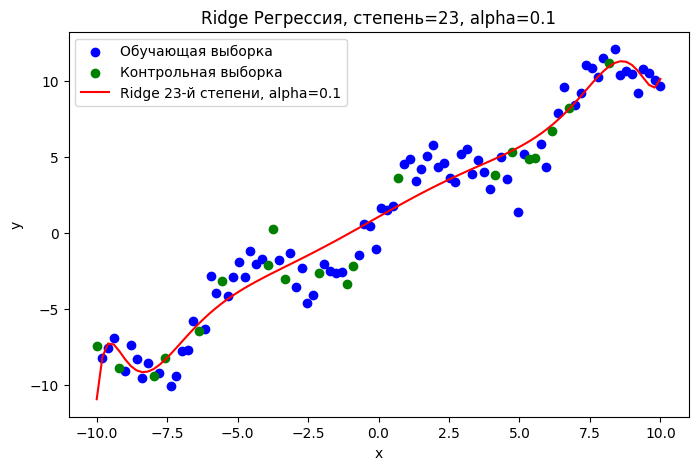

Коэффициенты полинома степени 23 (ridge, alpha=1):
[ 0.          4.99456188 -0.25625863  1.39280001  0.00987783  1.4439398
  0.14493538  0.37485165  0.16497035 -0.53212315  0.12413956 -0.96108152
  0.06523521 -0.99191444  0.0108214  -0.76864724 -0.03080067 -0.40878129
 -0.05883194  0.00834372 -0.0755971   0.43385619 -0.08420751  0.83973025]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.3354601388756047
MSE на контрольной выборке: 2.196070613696074



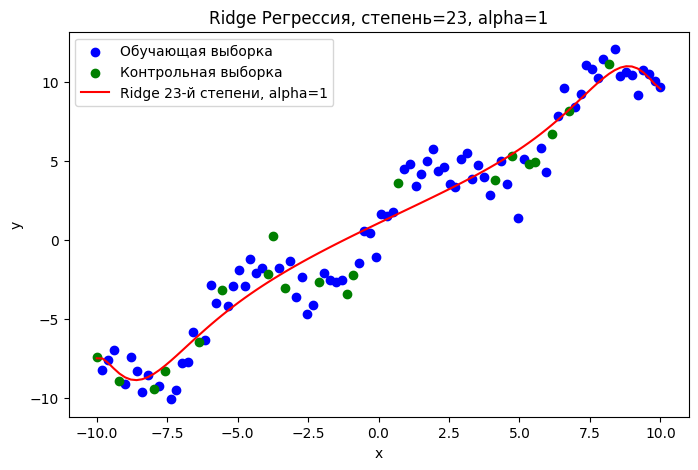

Коэффициенты полинома степени 23 (ridge, alpha=10):
[ 0.00000000e+00  3.88670989e+00 -1.34725307e-01  1.83951007e+00
  2.98658230e-03  9.23857487e-01  4.61337511e-02  3.19515484e-01
  4.67064581e-02 -4.25543981e-02  3.44962638e-02 -2.29732210e-01
  2.22307601e-02 -3.03061628e-01  1.43017425e-02 -3.06907711e-01
  1.15035600e-02 -2.70604236e-01  1.32617099e-02 -2.12706236e-01
  1.86131151e-02 -1.44659932e-01  2.66073272e-02 -7.33876213e-02]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.9944351923478734
MSE на контрольной выборке: 2.5454624870332454



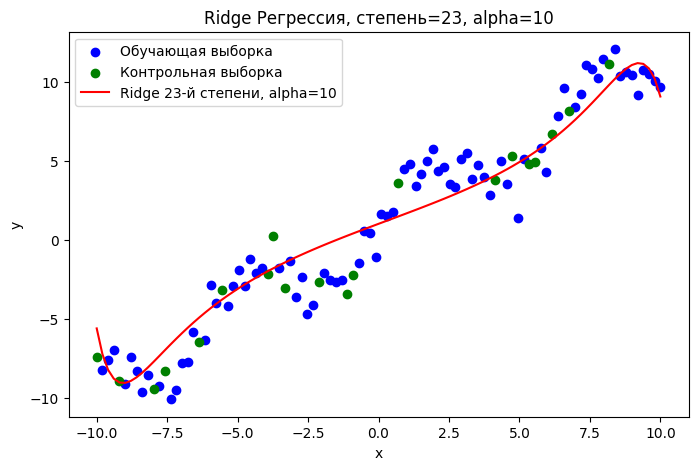

Коэффициенты полинома степени 23 (ridge, alpha=100):
[ 0.          1.72806735 -0.01828481  1.14632064  0.01964955  0.76192925
  0.02876952  0.49356728  0.02471816  0.30616027  0.01599675  0.17452918
  0.00608994  0.08092793 -0.00372204  0.01339091 -0.01303049 -0.03604359
 -0.02174951 -0.07269617 -0.02990032 -0.10016769 -0.03753032 -0.12093512]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 9.725982500119041
MSE на контрольной выборке: 9.521728942726362



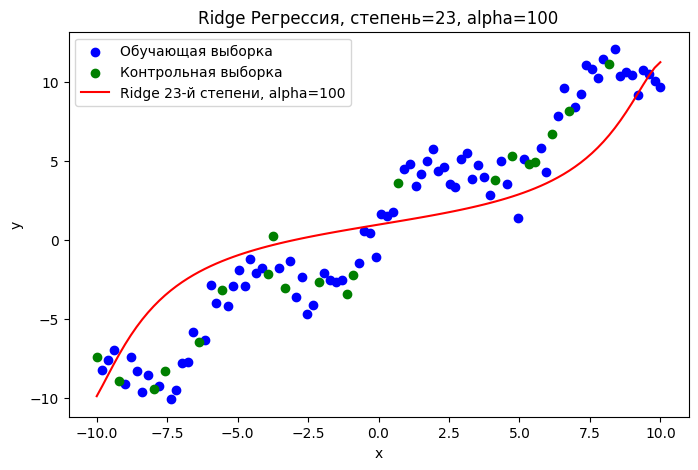

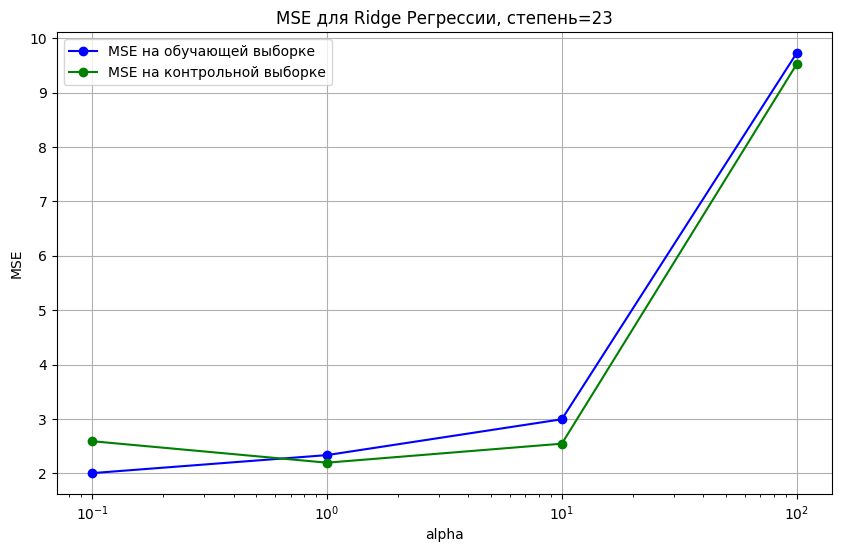

Коэффициенты полинома степени 13 (lasso, alpha=0.1):
[ 0.          6.04759289  0.          0.27248525  0.          0.
  0.          0.          0.         -0.          0.         -0.
  0.         -0.37022884]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.6098036632911623
MSE на контрольной выборке: 2.695641890722274



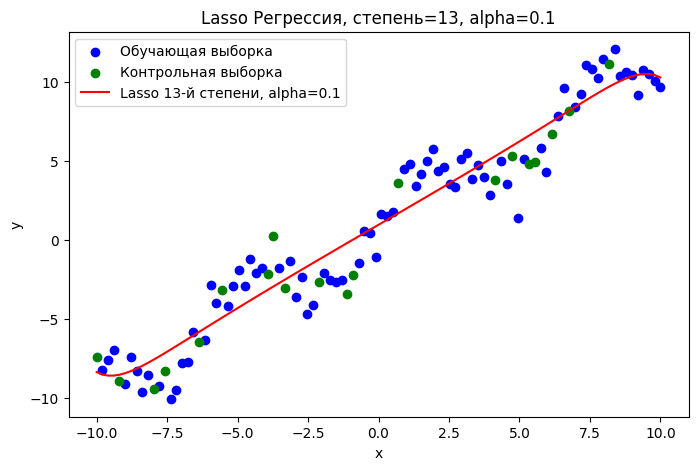

Коэффициенты полинома степени 13 (lasso, alpha=1):
[0.         5.16738339 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 3.769710832624619
MSE на контрольной выборке: 3.469223244890793



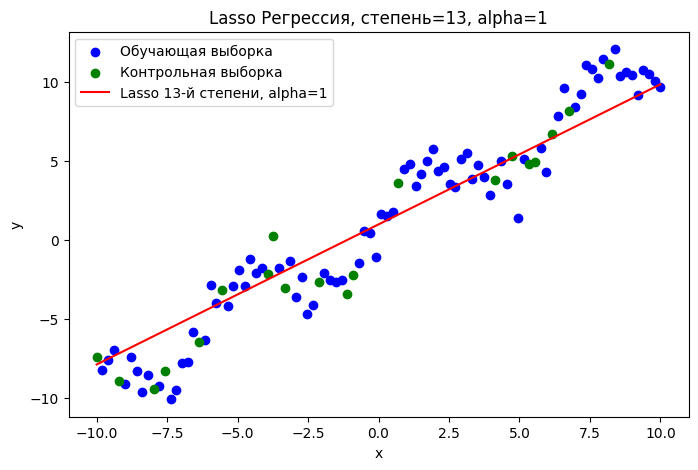

Коэффициенты полинома степени 13 (lasso, alpha=10):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 40.80632873153852
MSE на контрольной выборке: 38.4516996409282



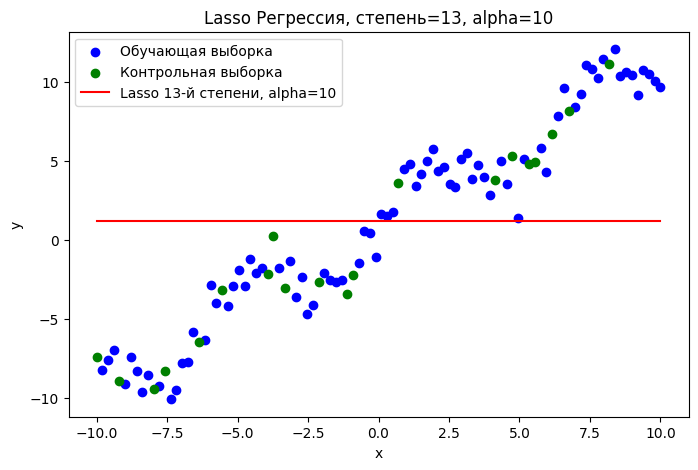

Коэффициенты полинома степени 13 (lasso, alpha=100):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 40.80632873153852
MSE на контрольной выборке: 38.4516996409282



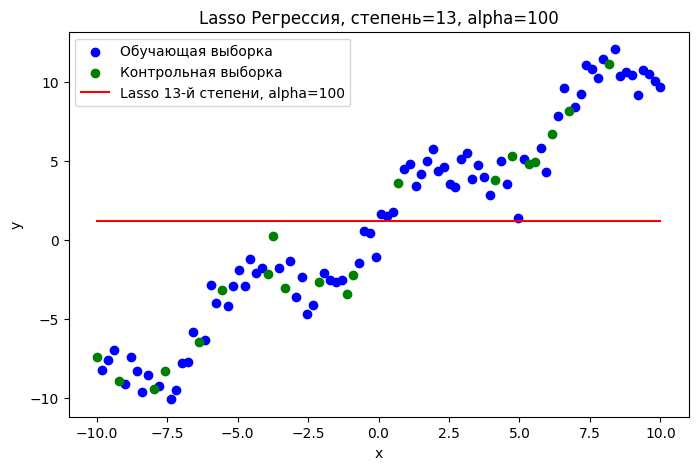

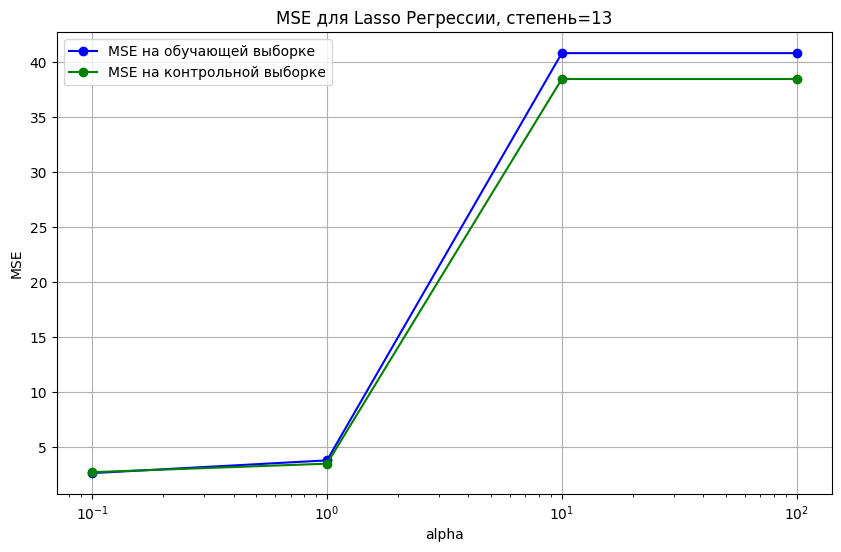

Коэффициенты полинома степени 18 (lasso, alpha=0.1):
[ 0.          6.01277906  0.          0.29819382  0.          0.
  0.          0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.39141449
  0.        ]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.591014569761632
MSE на контрольной выборке: 2.6385900009625467



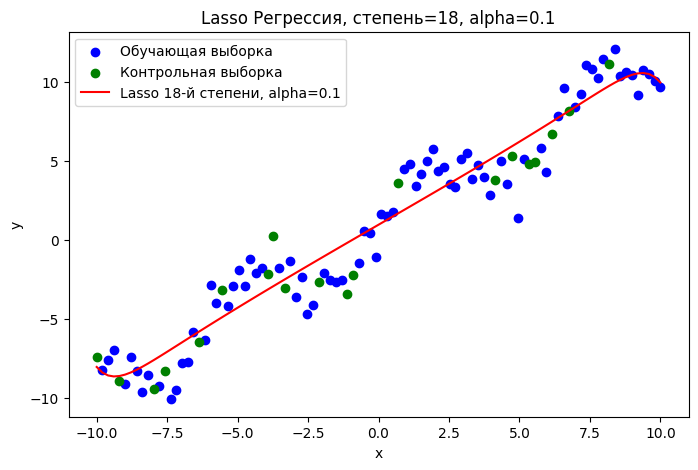

Коэффициенты полинома степени 18 (lasso, alpha=1):
[0.         5.16738339 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 3.769710832624619
MSE на контрольной выборке: 3.469223244890793



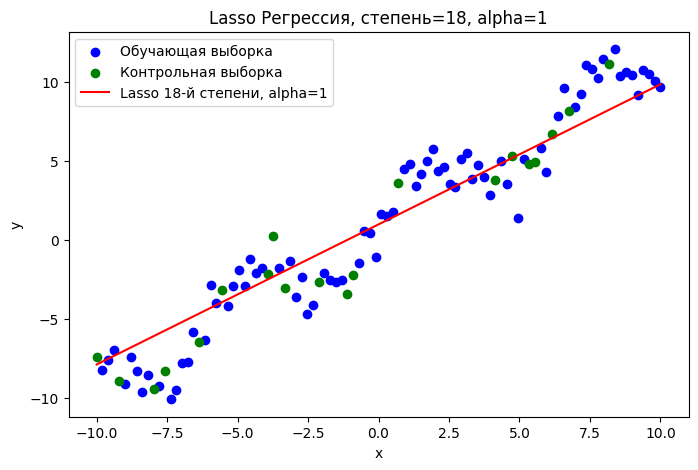

Коэффициенты полинома степени 18 (lasso, alpha=10):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 40.80632873153852
MSE на контрольной выборке: 38.4516996409282



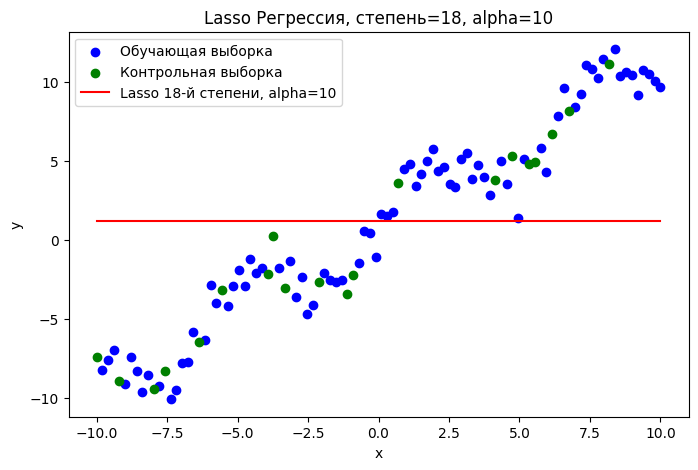

Коэффициенты полинома степени 18 (lasso, alpha=100):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 40.80632873153852
MSE на контрольной выборке: 38.4516996409282



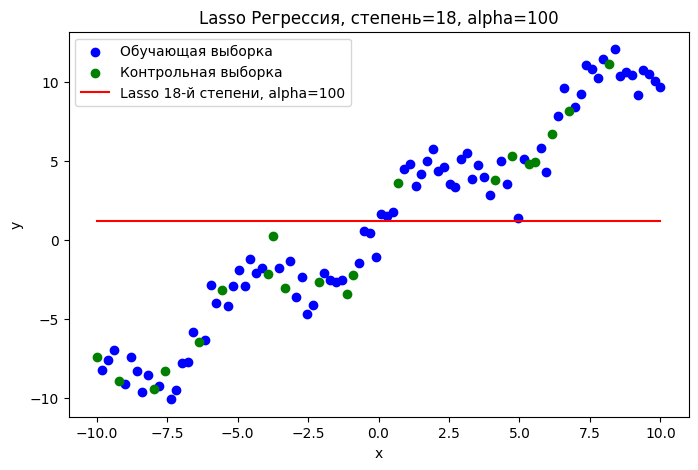

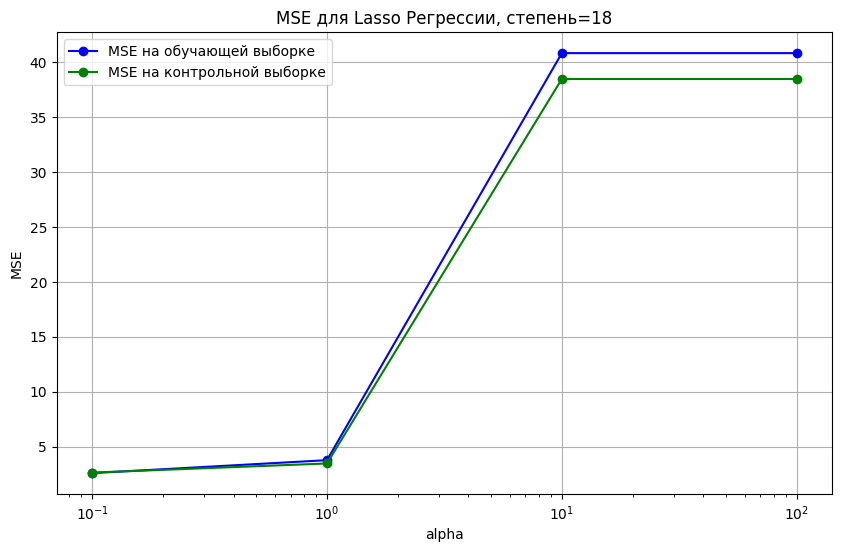

Коэффициенты полинома степени 23 (lasso, alpha=0.1):
[ 0.          6.03267364  0.          0.25476205  0.          0.
  0.          0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.35625813  0.         -0.01593521  0.         -0.        ]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.5976895425526156
MSE на контрольной выборке: 2.640051804079553



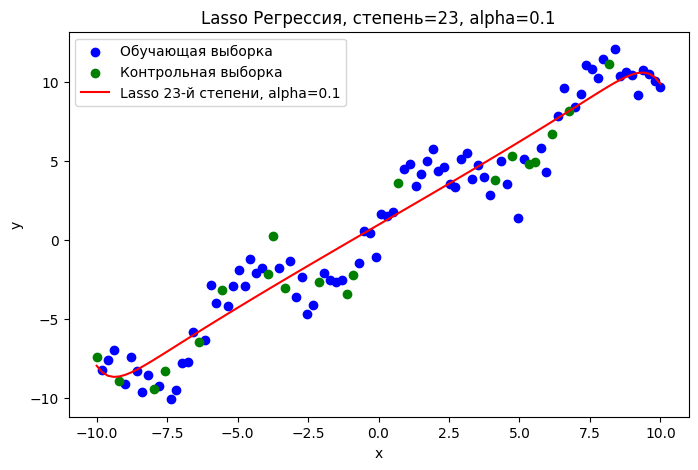

Коэффициенты полинома степени 23 (lasso, alpha=1):
[0.         5.16738339 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 3.769710832624619
MSE на контрольной выборке: 3.469223244890793



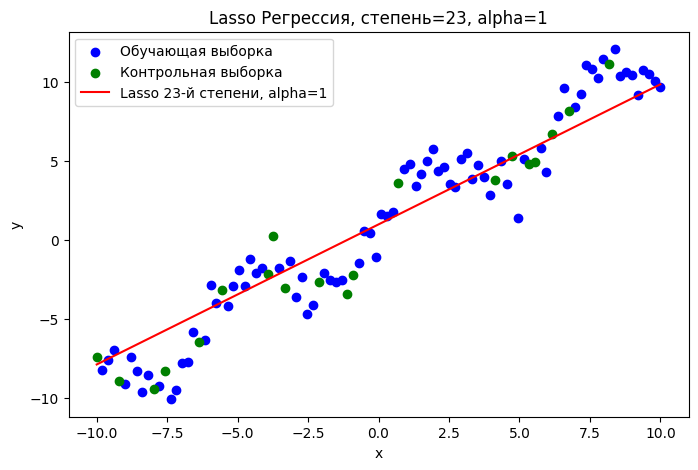

Коэффициенты полинома степени 23 (lasso, alpha=10):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 40.80632873153852
MSE на контрольной выборке: 38.4516996409282



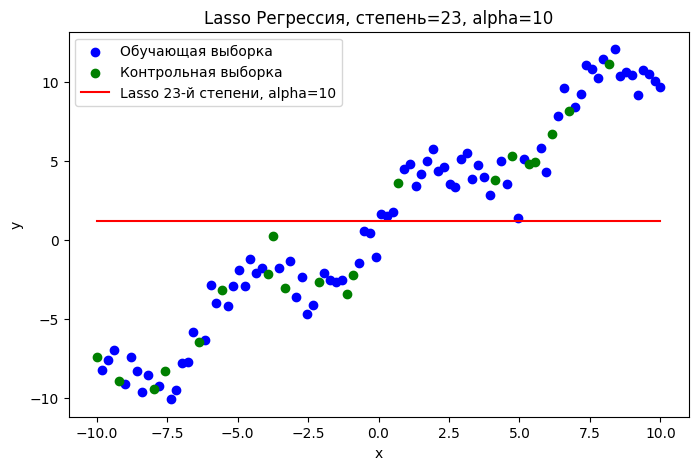

Коэффициенты полинома степени 23 (lasso, alpha=100):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 40.80632873153852
MSE на контрольной выборке: 38.4516996409282



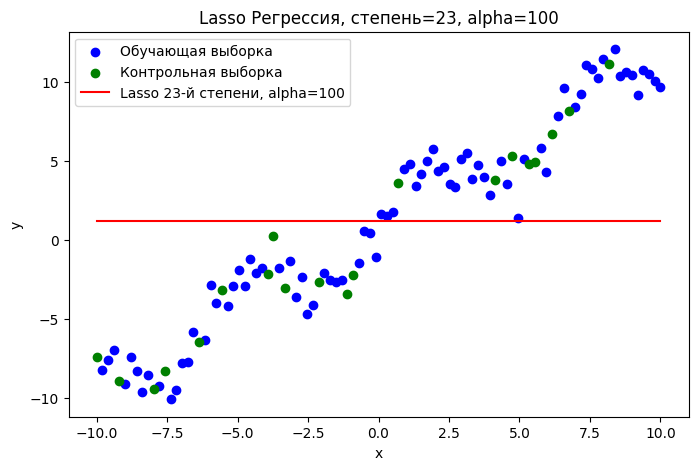

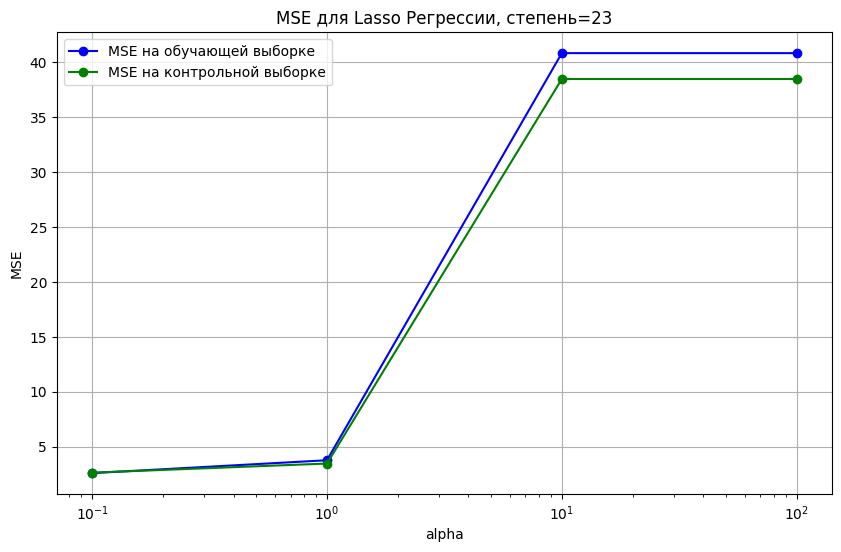

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def train_and_evaluate_model(degree, alpha_values, model_type):
    poly = PolynomialFeatures(degree=degree)
    scaler = StandardScaler()
    
    mse_train_values = []
    mse_test_values = []
    
    for alpha in alpha_values:
        if model_type == 'ridge':
            model = Ridge(alpha=alpha)
        elif model_type == 'lasso':
            model = Lasso(alpha=alpha, max_iter=10000)  # Увеличиваем max_iter для сходимости Lasso
        
        # Создаем конвейер для нормализации и модели
        pipeline = make_pipeline(poly, scaler, model)
        
        # Обучаем модель
        pipeline.fit(x_train.reshape(-1, 1), y_train)
        
        # Предсказываем значения на обучающей и контрольной выборках
        y_train_pred = pipeline.predict(x_train.reshape(-1, 1))
        y_test_pred = pipeline.predict(x_test.reshape(-1, 1))
        
        # Рассчитываем MSE
        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)
        
        mse_train_values.append(mse_train)
        mse_test_values.append(mse_test)
        
        # Выводим коэффициенты полинома
        coef = pipeline.named_steps[model_type].coef_
        intercept = pipeline.named_steps[model_type].intercept_
        print(f"Коэффициенты полинома степени {degree} ({model_type}, alpha={alpha}):")
        print(coef)
        print(f"Свободный член: {intercept}\n")
        print(f"MSE на обучающей выборке: {mse_train}")
        print(f"MSE на контрольной выборке: {mse_test}\n")
        
        # Визуализируем предсказания для текущей степени и alpha
        plt.figure(figsize=(8, 5))
        plt.scatter(x_train, y_train, label="Обучающая выборка", color="blue")
        plt.scatter(x_test, y_test, label="Контрольная выборка", color="green")
        plt.plot(x, pipeline.predict(x.reshape(-1, 1)), label=f"{model_type.capitalize()} {degree}-й степени, alpha={alpha}", color="red")
        plt.title(f"{model_type.capitalize()} Регрессия, степень={degree}, alpha={alpha}")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.show()
    
    # Визуализируем MSE для различных значений alpha
    plt.figure(figsize=(10, 6))
    plt.plot(alpha_values, mse_train_values, label="MSE на обучающей выборке", marker='o', color="blue")
    plt.plot(alpha_values, mse_test_values, label="MSE на контрольной выборке", marker='o', color="green")
    plt.xscale('log')
    plt.title(f"MSE для {model_type.capitalize()} Регрессии, степень={degree}")
    plt.xlabel("alpha")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.show()

# Оптимальная степень из лабораторной работы 1 пункт 1
optimal_degree = 13
# Полиномы большей степени (+5 и +10)
degrees = [optimal_degree, optimal_degree + 5, optimal_degree + 10]
# Значения параметра регуляризации
alpha_values = [0.1, 1, 10, 100]

# Применяем Ridge регрессию
for degree in degrees:
    train_and_evaluate_model(degree, alpha_values, 'ridge')

# Применяем Lasso регрессию
for degree in degrees:
    train_and_evaluate_model(degree, alpha_values, 'lasso')

Коэффициенты полинома степени 13 (ridge, alpha=0.1):
[ 0.          5.89613353 -0.28549213 -2.1293656   0.04910434  5.96436139
  0.25048749  0.53846767  0.14394732 -3.42746071 -0.03846008 -2.72701598
 -0.0406644   1.69387712]
Свободный член: 1.2215557308105898

MSE на обучающей выборке: 2.237950307600263
MSE на контрольной выборке: 2.2141426380142546

Коэффициенты полинома степени 13 (ridge, alpha=1):
[ 0.          5.06131455 -0.23693189  1.37331728  0.04701705  1.22622828
  0.13114479  0.13648454  0.10380384 -0.63673736  0.04221028 -0.83444984
 -0.00668841 -0.58173335]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.4040720021727973
MSE на контрольной выборке: 2.321040655741605

Коэффициенты полинома степени 13 (ridge, alpha=10):
[ 0.          3.93844603 -0.12874419  1.91952511  0.02257617  0.92762835
  0.06645797  0.21702041  0.05771365 -0.25384409  0.0290686  -0.54223073
 -0.00439377 -0.70587897]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.95378226

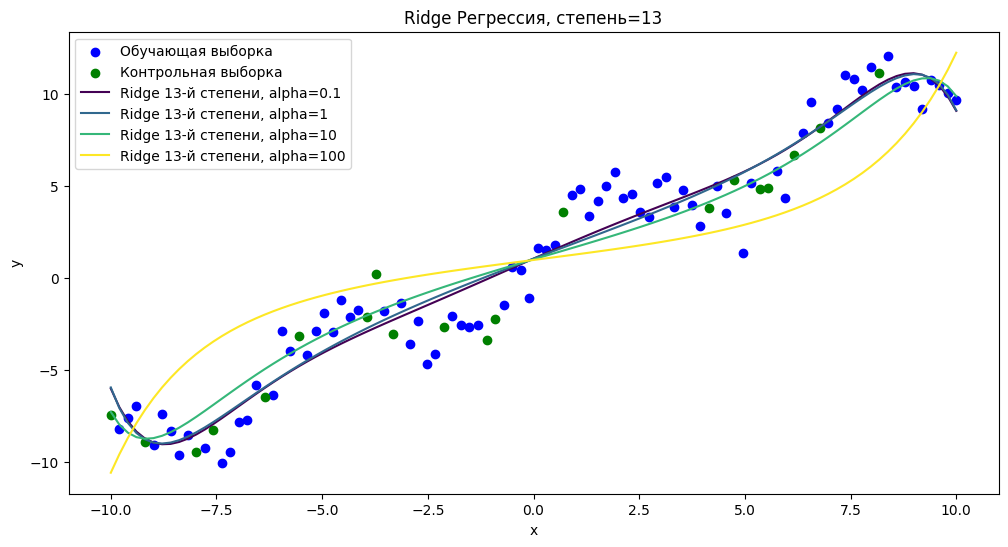

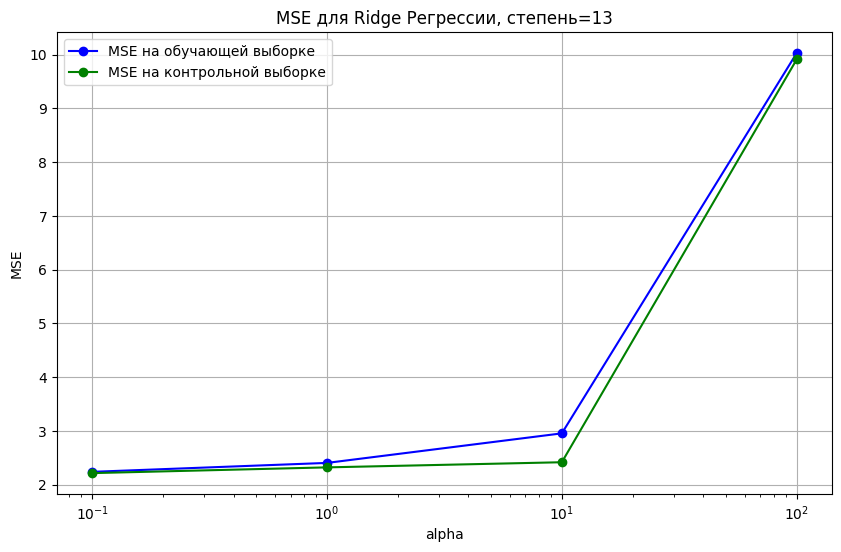

Коэффициенты полинома степени 18 (ridge, alpha=0.1):
[ 0.          5.95302643 -0.2342865  -3.00090553 -0.18679912  6.95689686
  0.21680172  2.20914365  0.37396907 -2.78397497  0.27131822 -4.39523502
  0.0767707  -3.06983145 -0.09270128  0.04331827 -0.19391856  3.99409601
 -0.22864102]
Свободный член: 1.22155573081059

MSE на обучающей выборке: 2.092441259746698
MSE на контрольной выборке: 2.0377721418290684

Коэффициенты полинома степени 18 (ridge, alpha=1):
[ 0.00000000e+00  5.04824982e+00 -2.41874811e-01  1.39245452e+00
  4.48892421e-02  1.26887824e+00  1.38934050e-01  1.63942530e-01
  1.17326181e-01 -6.50057198e-01  5.50395165e-02 -9.01438013e-01
 -4.78866736e-04 -7.07094061e-01 -2.81887353e-02 -2.36570770e-01
 -2.33641861e-02  3.76232523e-01  1.08734728e-02]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.3942801432439644
MSE на контрольной выборке: 2.297107335252712

Коэффициенты полинома степени 18 (ridge, alpha=10):
[ 0.00000000e+00  3.89595021e+00 -1.37265164e-0

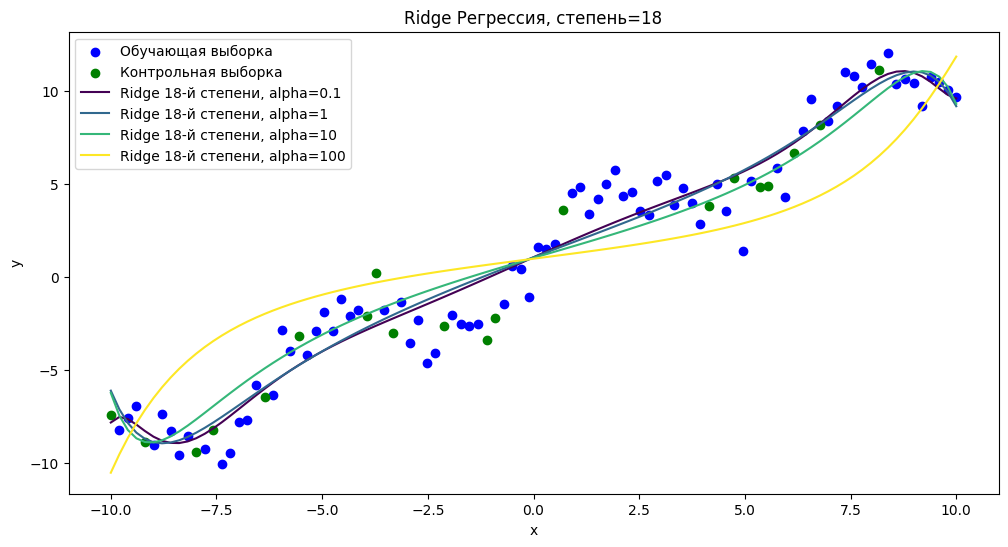

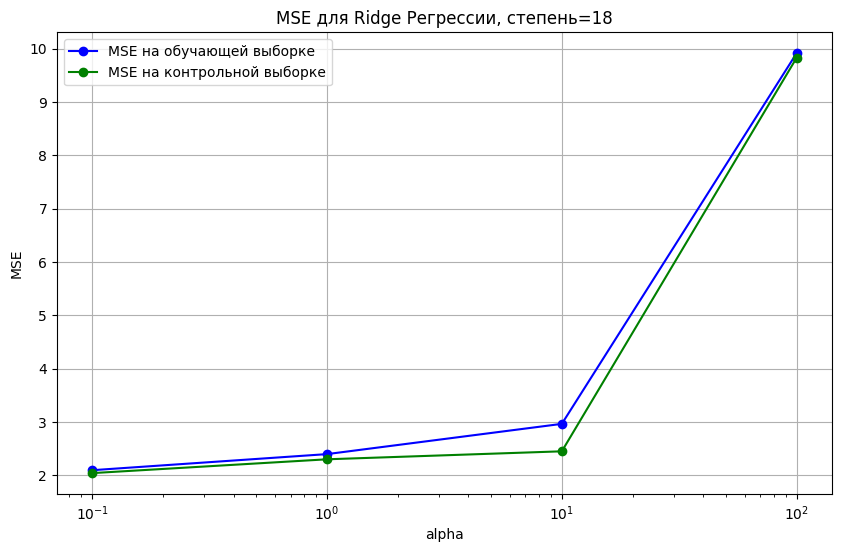

Коэффициенты полинома степени 23 (ridge, alpha=0.1):
[ 0.          6.10777686 -0.16765998 -3.76562457 -0.24226096  6.87124951
 -0.02963608  3.27171642  0.21939387 -1.28230185  0.35653514 -3.42287543
  0.39424984 -3.47667224  0.35077388 -2.37667043  0.2208328  -0.86383443
 -0.01301921  0.60613511 -0.36807136  1.79506093 -0.85495519  2.60349328]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.0042032120194095
MSE на контрольной выборке: 2.5910175209741952

Коэффициенты полинома степени 23 (ridge, alpha=1):
[ 0.          4.99456188 -0.25625863  1.39280001  0.00987783  1.4439398
  0.14493538  0.37485165  0.16497035 -0.53212315  0.12413956 -0.96108152
  0.06523521 -0.99191444  0.0108214  -0.76864724 -0.03080067 -0.40878129
 -0.05883194  0.00834372 -0.0755971   0.43385619 -0.08420751  0.83973025]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.3354601388756047
MSE на контрольной выборке: 2.196070613696074

Коэффициенты полинома степени 23 (ridge, alpha=10):
[ 

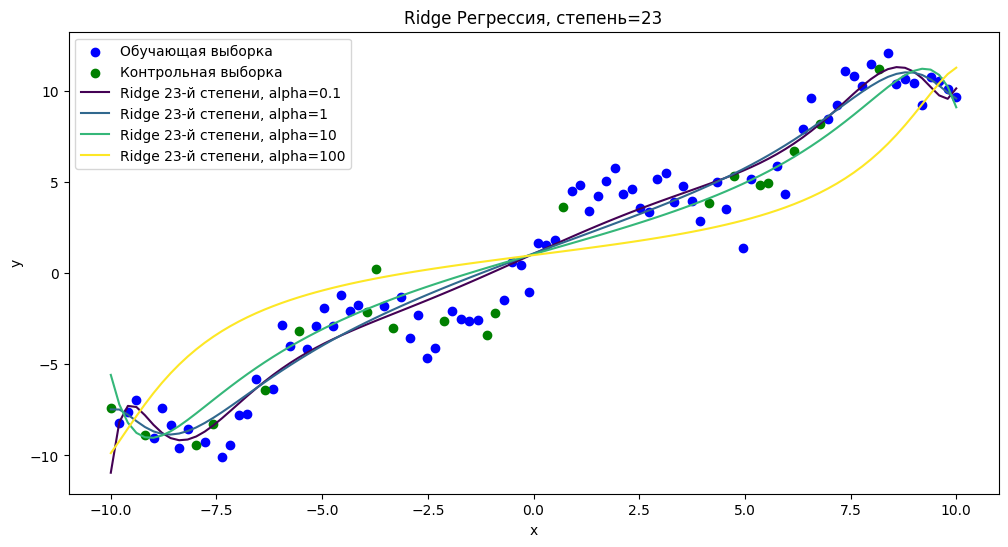

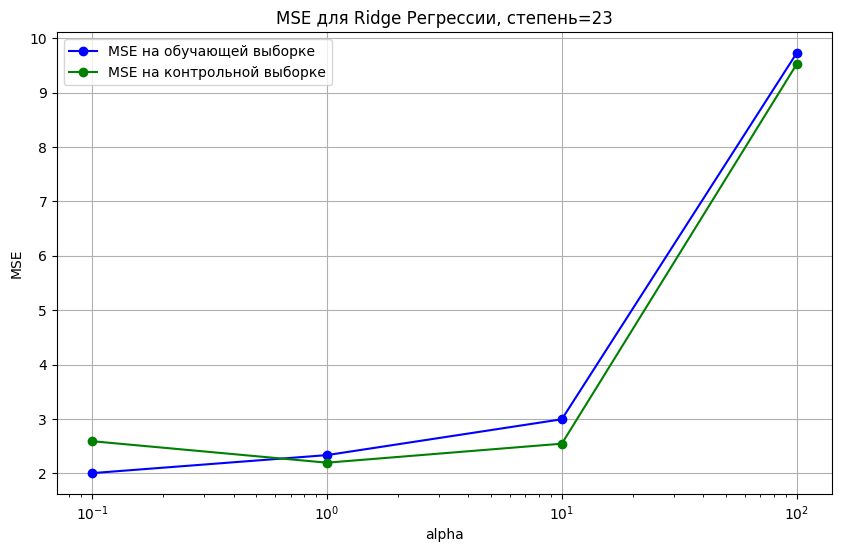

Коэффициенты полинома степени 13 (lasso, alpha=0.1):
[ 0.          6.04759289  0.          0.27248525  0.          0.
  0.          0.          0.         -0.          0.         -0.
  0.         -0.37022884]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.6098036632911623
MSE на контрольной выборке: 2.695641890722274

Коэффициенты полинома степени 13 (lasso, alpha=1):
[0.         5.16738339 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 3.769710832624619
MSE на контрольной выборке: 3.469223244890793

Коэффициенты полинома степени 13 (lasso, alpha=10):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 40.80632873153852
MSE на контрольной выборке: 38.4516996409282

Коэффициенты полинома степени 13 (lasso, alpha=100):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Свободный член: 1.221555

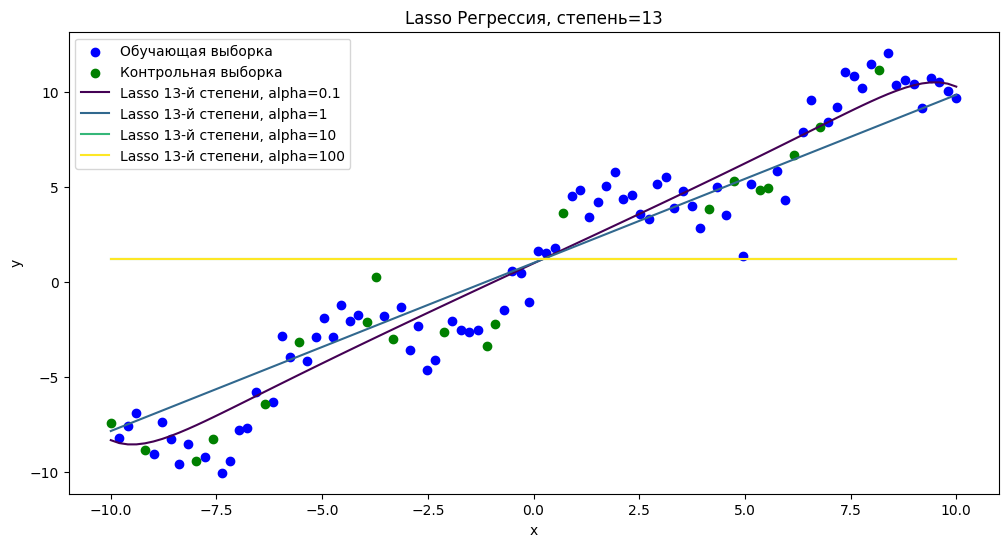

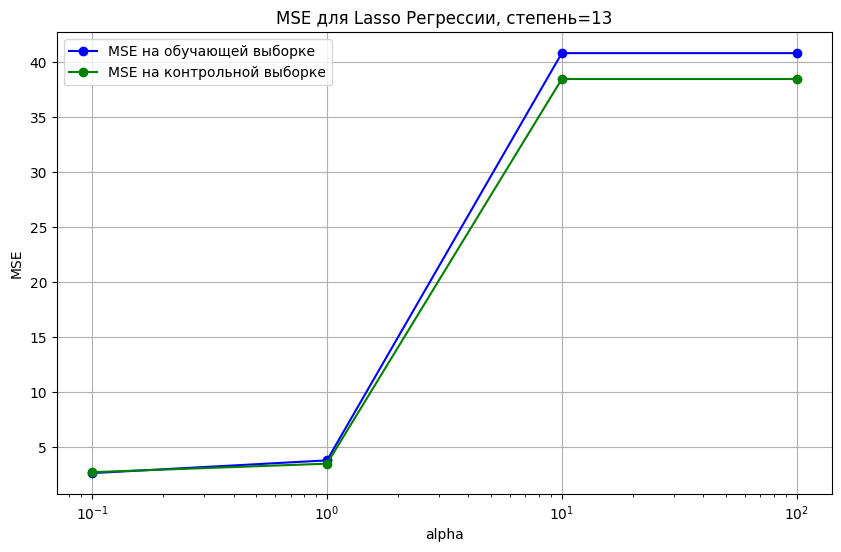

Коэффициенты полинома степени 18 (lasso, alpha=0.1):
[ 0.          6.01277906  0.          0.29819382  0.          0.
  0.          0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.39141449
  0.        ]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.591014569761632
MSE на контрольной выборке: 2.6385900009625467

Коэффициенты полинома степени 18 (lasso, alpha=1):
[0.         5.16738339 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 3.769710832624619
MSE на контрольной выборке: 3.469223244890793

Коэффициенты полинома степени 18 (lasso, alpha=10):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 40.80632873153852
MSE на контрольной выборке: 38.451699640928

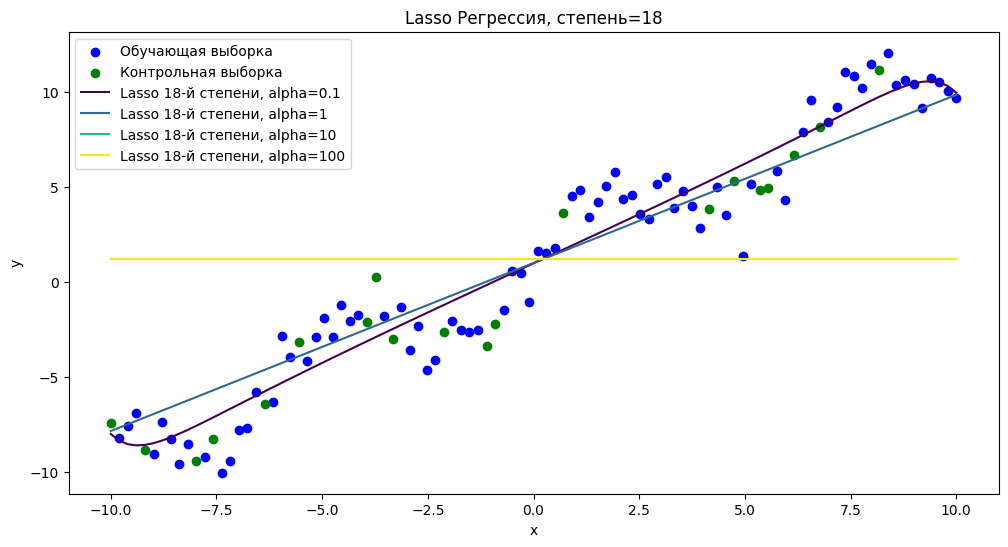

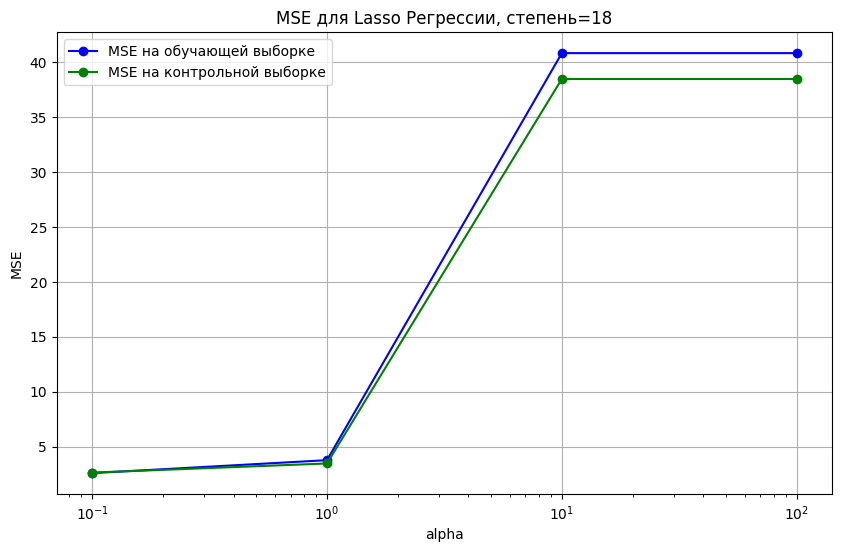

Коэффициенты полинома степени 23 (lasso, alpha=0.1):
[ 0.          6.03267364  0.          0.25476205  0.          0.
  0.          0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.35625813  0.         -0.01593521  0.         -0.        ]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.5976895425526156
MSE на контрольной выборке: 2.640051804079553

Коэффициенты полинома степени 23 (lasso, alpha=1):
[0.         5.16738339 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 3.769710832624619
MSE на контрольной выборке: 3.469223244890793

Коэффициенты полинома степени 23 (lasso, alpha=10):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
С

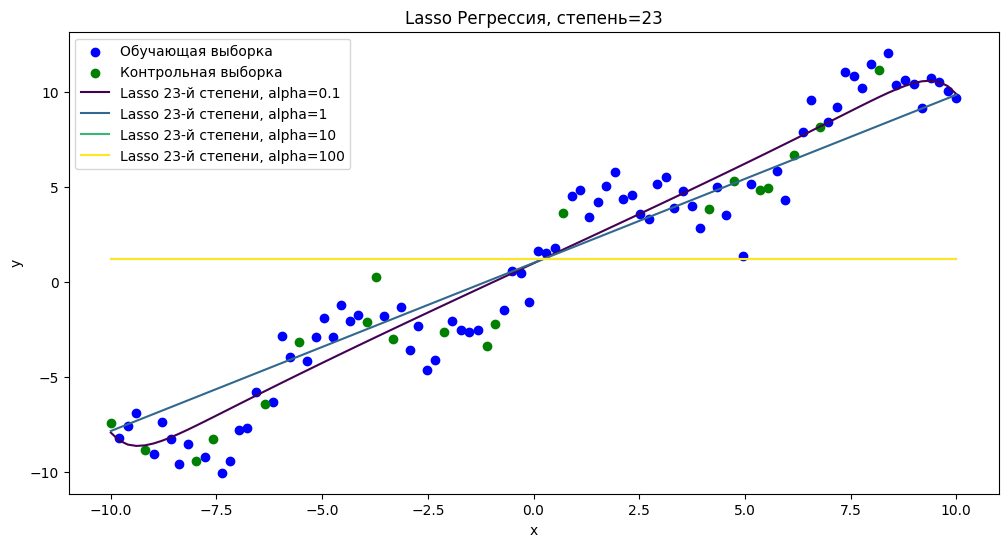

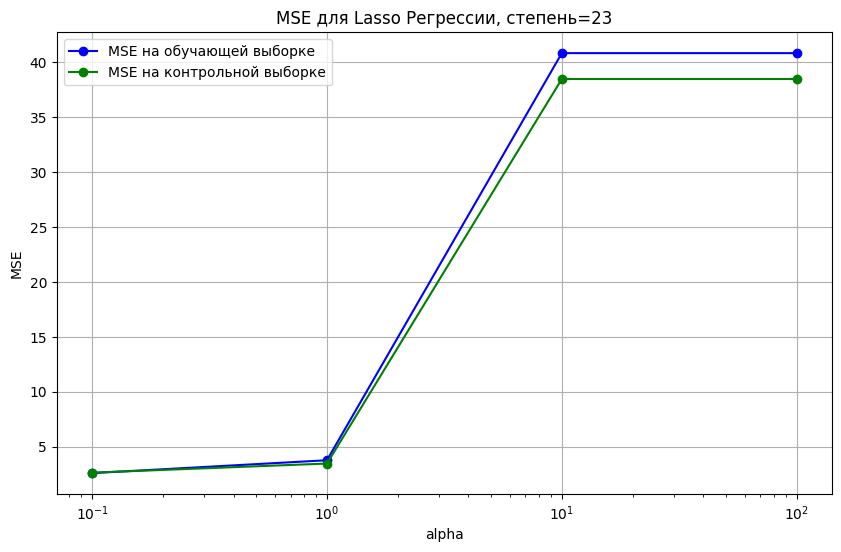

In [21]:
def train_and_evaluate_model(degree, alpha_values, model_type):
    poly = PolynomialFeatures(degree=degree)
    scaler = StandardScaler()
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(alpha_values)))
    
    plt.figure(figsize=(12, 6))
    plt.scatter(x_train, y_train, label="Обучающая выборка", color="blue")
    plt.scatter(x_test, y_test, label="Контрольная выборка", color="green")
    
    for i, alpha in enumerate(alpha_values):
        if model_type == 'ridge':
            model = Ridge(alpha=alpha)
        elif model_type == 'lasso':
            model = Lasso(alpha=alpha, max_iter=10000)  # Увеличиваем max_iter для сходимости Lasso
        
        # Создаем конвейер для нормализации и модели
        pipeline = make_pipeline(poly, scaler, model)
        
        # Обучаем модель
        pipeline.fit(x_train.reshape(-1, 1), y_train)
        
        # Предсказываем значения на обучающей и контрольной выборках
        y_train_pred = pipeline.predict(x_train.reshape(-1, 1))
        y_test_pred = pipeline.predict(x_test.reshape(-1, 1))
        
        # Рассчитываем MSE
        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)
        
        # Выводим коэффициенты полинома
        coef = pipeline.named_steps[model_type].coef_
        intercept = pipeline.named_steps[model_type].intercept_
        print(f"Коэффициенты полинома степени {degree} ({model_type}, alpha={alpha}):")
        print(coef)
        print(f"Свободный член: {intercept}\n")
        print(f"MSE на обучающей выборке: {mse_train}")
        print(f"MSE на контрольной выборке: {mse_test}\n")
        
        # Визуализируем предсказания для текущей степени и alpha
        plt.plot(x, pipeline.predict(x.reshape(-1, 1)), label=f"{model_type.capitalize()} {degree}-й степени, alpha={alpha}", color=colors[i])
    
    plt.title(f"{model_type.capitalize()} Регрессия, степень={degree}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()
    
    # Визуализируем MSE для различных значений alpha
    plt.figure(figsize=(10, 6))
    mse_train_values = []
    mse_test_values = []
    
    for alpha in alpha_values:
        if model_type == 'ridge':
            model = Ridge(alpha=alpha)
        elif model_type == 'lasso':
            model = Lasso(alpha=alpha, max_iter=10000)  # Увеличиваем max_iter для сходимости Lasso
        
        # Создаем конвейер для нормализации и модели
        pipeline = make_pipeline(poly, scaler, model)
        
        # Обучаем модель
        pipeline.fit(x_train.reshape(-1, 1), y_train)
        
        # Предсказываем значения на обучающей и контрольной выборках
        y_train_pred = pipeline.predict(x_train.reshape(-1, 1))
        y_test_pred = pipeline.predict(x_test.reshape(-1, 1))
        
        # Рассчитываем MSE
        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)
        
        mse_train_values.append(mse_train)
        mse_test_values.append(mse_test)
    
    plt.plot(alpha_values, mse_train_values, label="MSE на обучающей выборке", marker='o', color="blue")
    plt.plot(alpha_values, mse_test_values, label="MSE на контрольной выборке", marker='o', color="green")
    plt.xscale('log')
    plt.title(f"MSE для {model_type.capitalize()} Регрессии, степень={degree}")
    plt.xlabel("alpha")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.show()

# Оптимальная степень из лабораторной работы 1 пункт 1
optimal_degree = 13
# Полиномы большей степени (+5 и +10)
degrees = [optimal_degree, optimal_degree + 5, optimal_degree + 10]
# Значения параметра регуляризации
alpha_values = [0.1, 1, 10, 100]

# Применяем Ridge регрессию
for degree in degrees:
    train_and_evaluate_model(degree, alpha_values, 'ridge')

# Применяем Lasso регрессию
for degree in degrees:
    train_and_evaluate_model(degree, alpha_values, 'lasso')

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

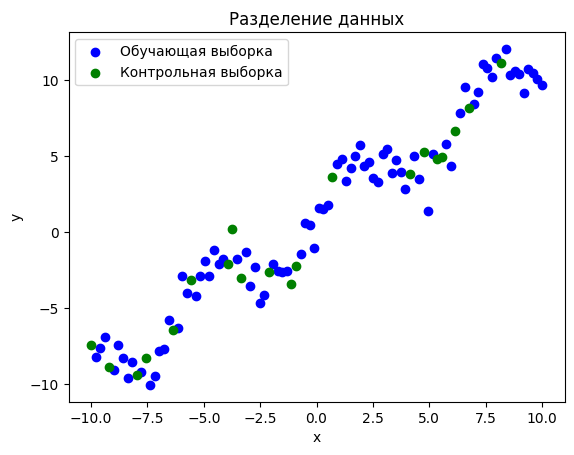

Коэффициенты полинома степени 13 (ridge, alpha=0.1):
[ 0.          5.89613353 -0.28549213 -2.1293656   0.04910434  5.96436139
  0.25048749  0.53846767  0.14394732 -3.42746071 -0.03846008 -2.72701598
 -0.0406644   1.69387712]
Свободный член: 1.2215557308105898

MSE на обучающей выборке: 2.237950307600263
MSE на контрольной выборке: 2.2141426380142546

Коэффициенты полинома степени 13 (ridge, alpha=1):
[ 0.          5.06131455 -0.23693189  1.37331728  0.04701705  1.22622828
  0.13114479  0.13648454  0.10380384 -0.63673736  0.04221028 -0.83444984
 -0.00668841 -0.58173335]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.4040720021727973
MSE на контрольной выборке: 2.321040655741605

Коэффициенты полинома степени 13 (ridge, alpha=10):
[ 0.          3.93844603 -0.12874419  1.91952511  0.02257617  0.92762835
  0.06645797  0.21702041  0.05771365 -0.25384409  0.0290686  -0.54223073
 -0.00439377 -0.70587897]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.95378226

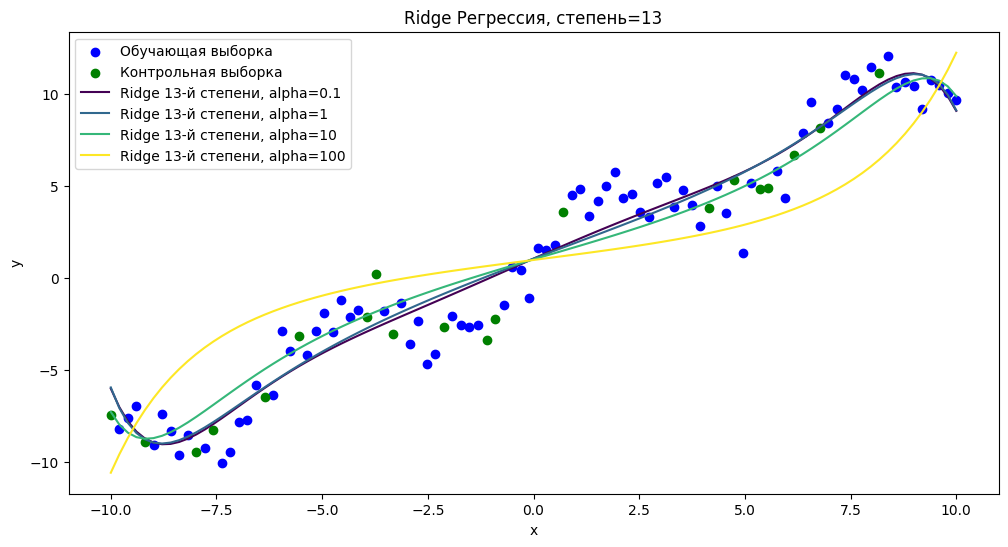

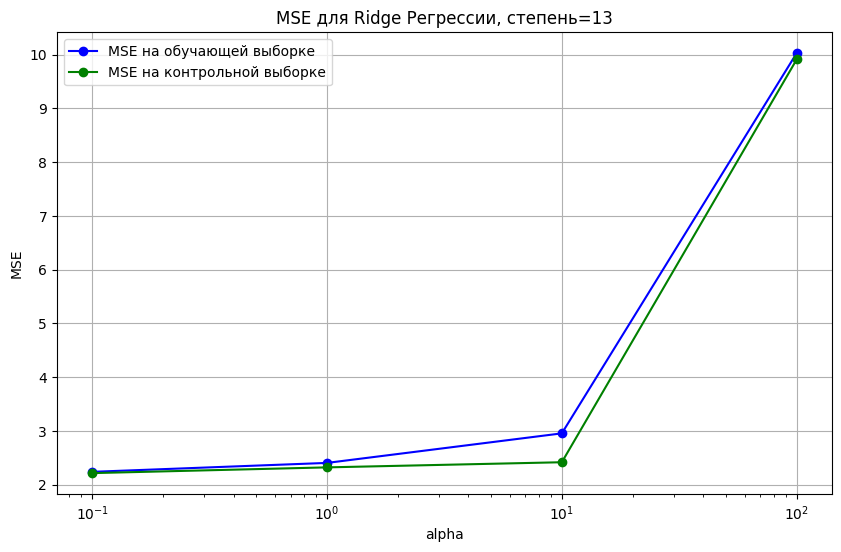

Коэффициенты полинома степени 18 (ridge, alpha=0.1):
[ 0.          5.95302643 -0.2342865  -3.00090553 -0.18679912  6.95689686
  0.21680172  2.20914365  0.37396907 -2.78397497  0.27131822 -4.39523502
  0.0767707  -3.06983145 -0.09270128  0.04331827 -0.19391856  3.99409601
 -0.22864102]
Свободный член: 1.22155573081059

MSE на обучающей выборке: 2.092441259746698
MSE на контрольной выборке: 2.0377721418290684

Коэффициенты полинома степени 18 (ridge, alpha=1):
[ 0.00000000e+00  5.04824982e+00 -2.41874811e-01  1.39245452e+00
  4.48892421e-02  1.26887824e+00  1.38934050e-01  1.63942530e-01
  1.17326181e-01 -6.50057198e-01  5.50395165e-02 -9.01438013e-01
 -4.78866736e-04 -7.07094061e-01 -2.81887353e-02 -2.36570770e-01
 -2.33641861e-02  3.76232523e-01  1.08734728e-02]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.3942801432439644
MSE на контрольной выборке: 2.297107335252712

Коэффициенты полинома степени 18 (ridge, alpha=10):
[ 0.00000000e+00  3.89595021e+00 -1.37265164e-0

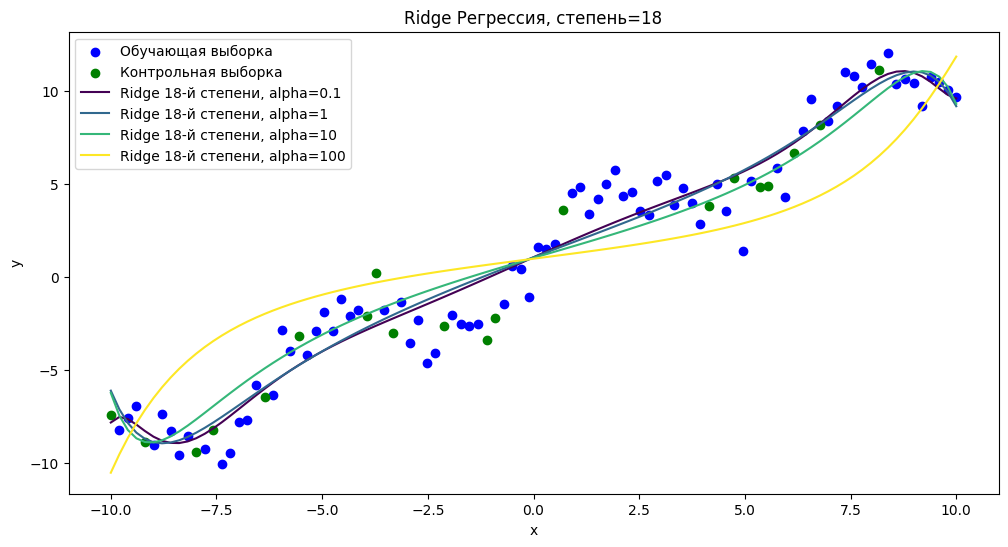

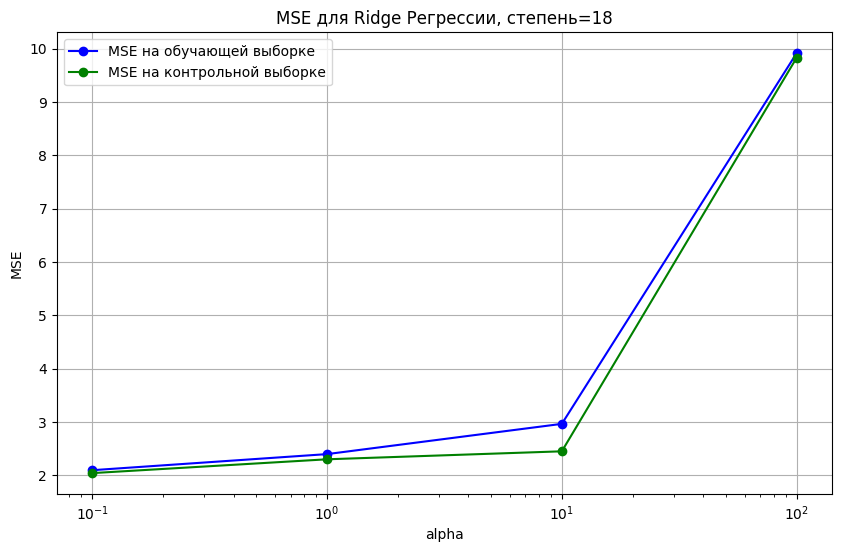

Коэффициенты полинома степени 23 (ridge, alpha=0.1):
[ 0.          6.10777686 -0.16765998 -3.76562457 -0.24226096  6.87124951
 -0.02963608  3.27171642  0.21939387 -1.28230185  0.35653514 -3.42287543
  0.39424984 -3.47667224  0.35077388 -2.37667043  0.2208328  -0.86383443
 -0.01301921  0.60613511 -0.36807136  1.79506093 -0.85495519  2.60349328]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.0042032120194095
MSE на контрольной выборке: 2.5910175209741952

Коэффициенты полинома степени 23 (ridge, alpha=1):
[ 0.          4.99456188 -0.25625863  1.39280001  0.00987783  1.4439398
  0.14493538  0.37485165  0.16497035 -0.53212315  0.12413956 -0.96108152
  0.06523521 -0.99191444  0.0108214  -0.76864724 -0.03080067 -0.40878129
 -0.05883194  0.00834372 -0.0755971   0.43385619 -0.08420751  0.83973025]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.3354601388756047
MSE на контрольной выборке: 2.196070613696074

Коэффициенты полинома степени 23 (ridge, alpha=10):
[ 

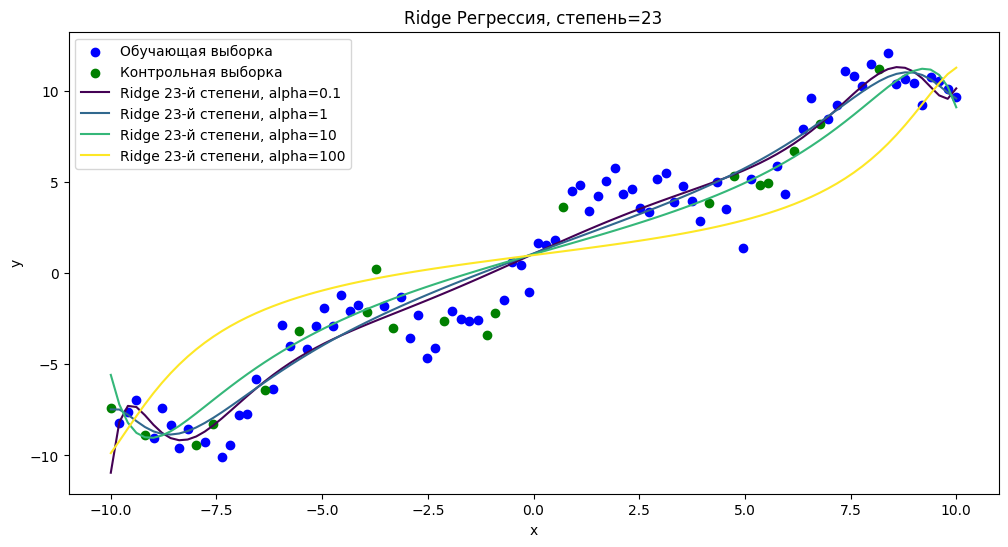

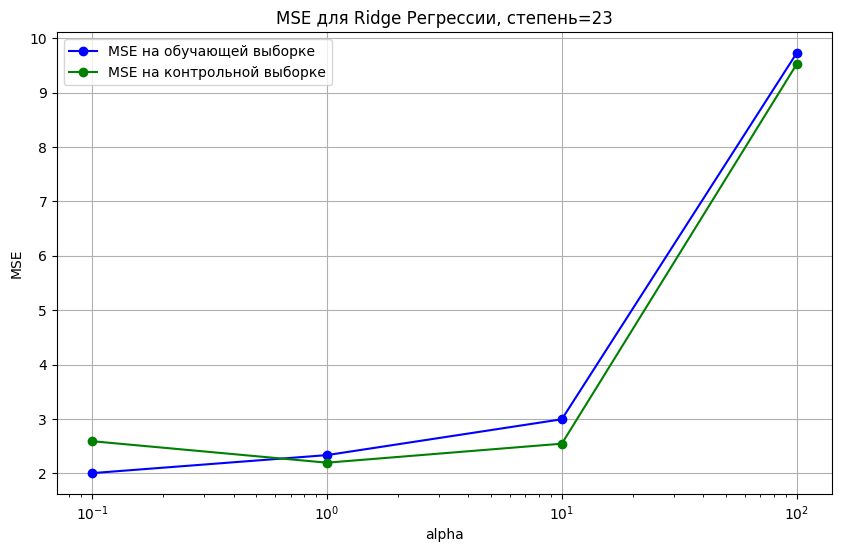

Коэффициенты полинома степени 13 (lasso, alpha=0.1):
[ 0.          6.04759289  0.          0.27248525  0.          0.
  0.          0.          0.         -0.          0.         -0.
  0.         -0.37022884]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.6098036632911623
MSE на контрольной выборке: 2.695641890722274

Коэффициенты полинома степени 13 (lasso, alpha=1):
[0.         5.16738339 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 3.769710832624619
MSE на контрольной выборке: 3.469223244890793

Коэффициенты полинома степени 13 (lasso, alpha=10):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 40.80632873153852
MSE на контрольной выборке: 38.4516996409282

Коэффициенты полинома степени 13 (lasso, alpha=100):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Свободный член: 1.221555

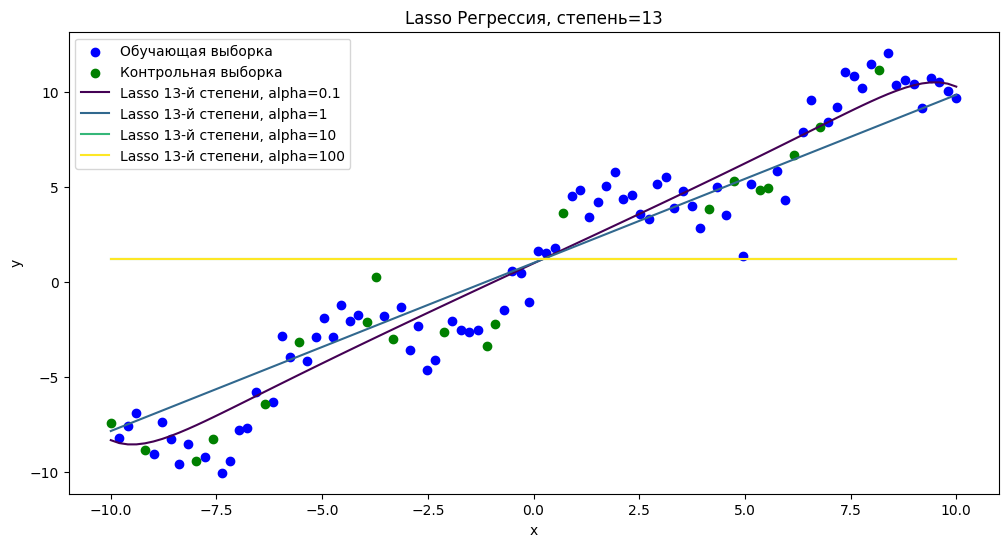

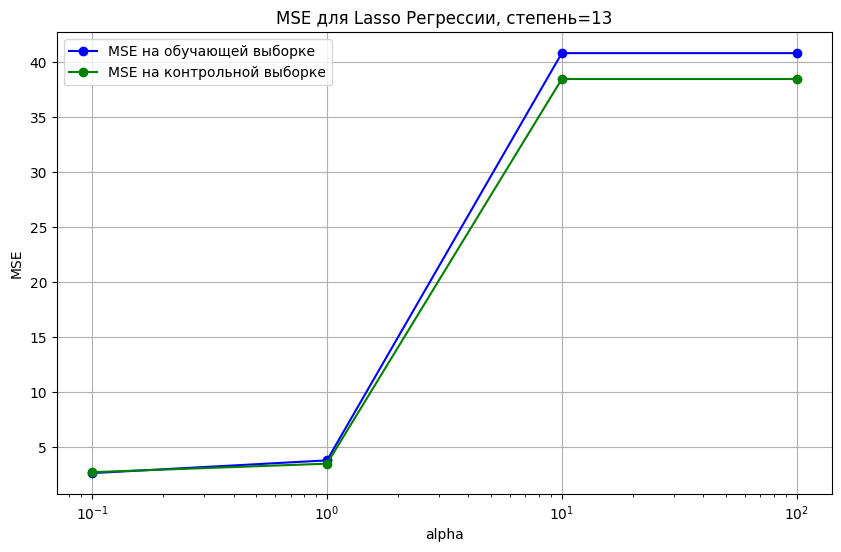

Коэффициенты полинома степени 18 (lasso, alpha=0.1):
[ 0.          6.01277906  0.          0.29819382  0.          0.
  0.          0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.39141449
  0.        ]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.591014569761632
MSE на контрольной выборке: 2.6385900009625467

Коэффициенты полинома степени 18 (lasso, alpha=1):
[0.         5.16738339 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 3.769710832624619
MSE на контрольной выборке: 3.469223244890793

Коэффициенты полинома степени 18 (lasso, alpha=10):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 40.80632873153852
MSE на контрольной выборке: 38.451699640928

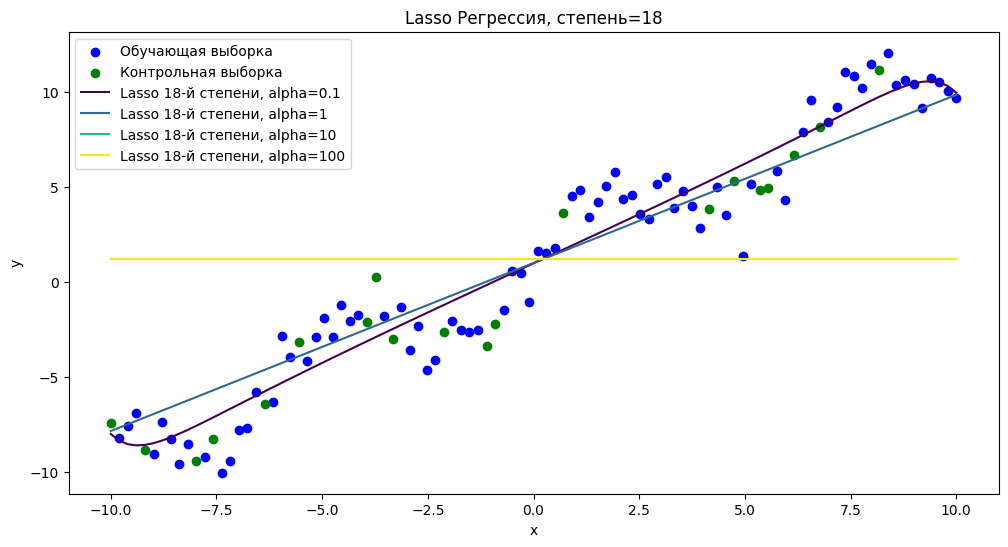

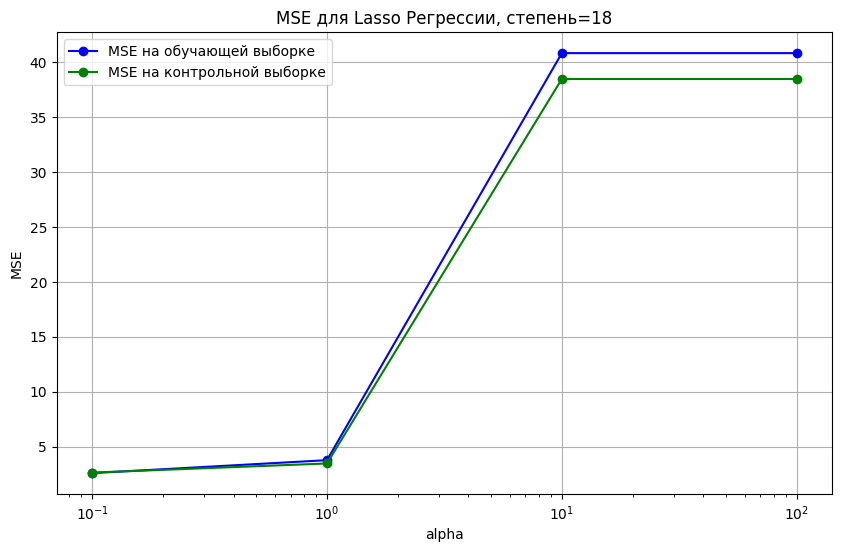

Коэффициенты полинома степени 23 (lasso, alpha=0.1):
[ 0.          6.03267364  0.          0.25476205  0.          0.
  0.          0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.35625813  0.         -0.01593521  0.         -0.        ]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 2.5976895425526156
MSE на контрольной выборке: 2.640051804079553

Коэффициенты полинома степени 23 (lasso, alpha=1):
[0.         5.16738339 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
Свободный член: 1.2215557308105902

MSE на обучающей выборке: 3.769710832624619
MSE на контрольной выборке: 3.469223244890793

Коэффициенты полинома степени 23 (lasso, alpha=10):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
С

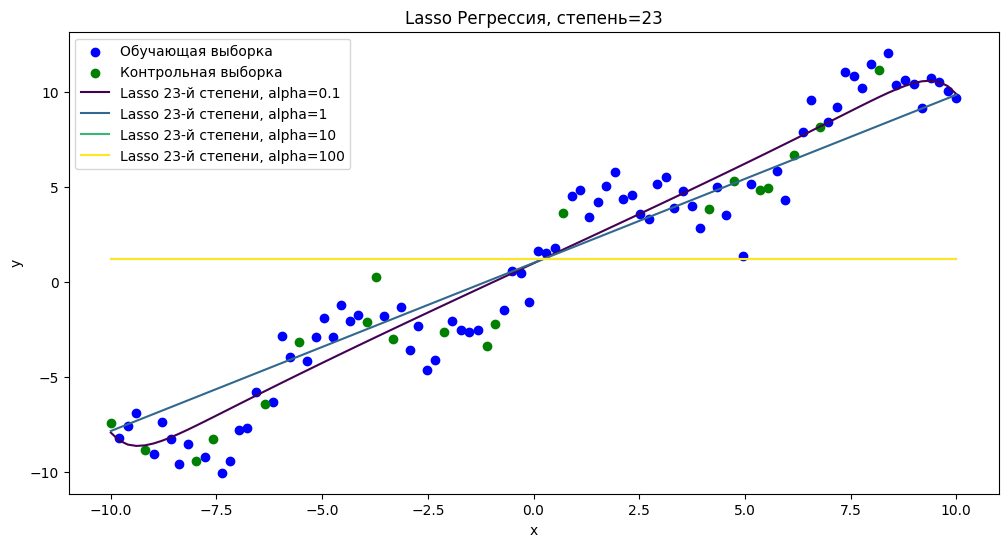

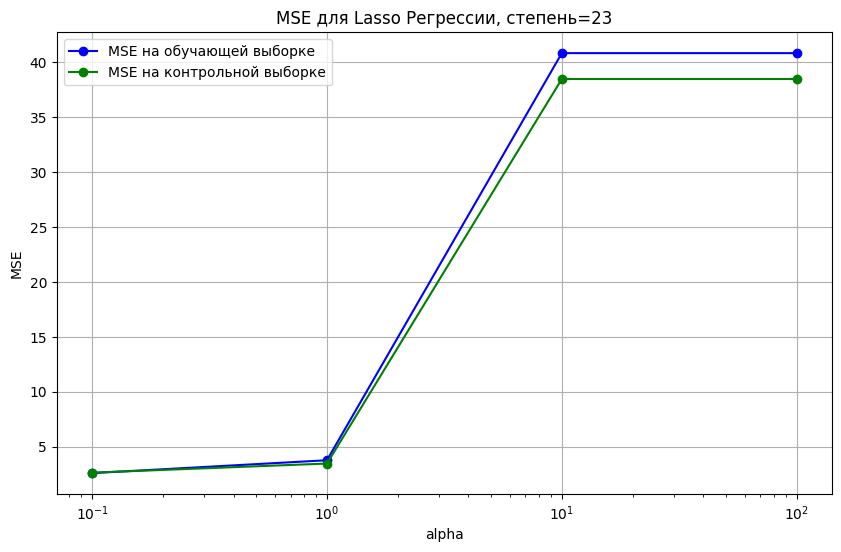

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Задаем параметры генерации данных
np.random.seed(42)  # Для воспроизводимости результатов
n_samples = 100     # Количество точек
x = np.linspace(-10, 10, n_samples)  # Диапазон значений x
noise = np.random.normal(0, 1, n_samples)  # Шум с N(0, 1)

# Функция y(x)
theta1, theta2, theta3 = 1, 2, 1
y = theta1 * x + theta2 * np.sin(x) + theta3 + noise

# Разделяем данные на обучающую и контрольную выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Визуализируем данные
plt.scatter(x_train, y_train, label="Обучающая выборка", color="blue")
plt.scatter(x_test, y_test, label="Контрольная выборка", color="green")
plt.title("Разделение данных")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

def train_and_evaluate_model(degree, alpha_values, model_type):
    poly = PolynomialFeatures(degree=degree)
    scaler = StandardScaler()
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(alpha_values)))
    
    plt.figure(figsize=(12, 6))
    plt.scatter(x_train, y_train, label="Обучающая выборка", color="blue")
    plt.scatter(x_test, y_test, label="Контрольная выборка", color="green")
    
    mse_train_values = []
    mse_test_values = []
    
    for i, alpha in enumerate(alpha_values):
        if model_type == 'ridge':
            model = Ridge(alpha=alpha)
        elif model_type == 'lasso':
            model = Lasso(alpha=alpha, max_iter=10000)  # Увеличиваем max_iter для сходимости Lasso
        
        # Создаем конвейер для нормализации и модели
        pipeline = make_pipeline(poly, scaler, model)
        
        # Обучаем модель
        pipeline.fit(x_train.reshape(-1, 1), y_train)
        
        # Предсказываем значения на обучающей и контрольной выборках
        y_train_pred = pipeline.predict(x_train.reshape(-1, 1))
        y_test_pred = pipeline.predict(x_test.reshape(-1, 1))
        
        # Рассчитываем MSE
        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)
        
        mse_train_values.append(mse_train)
        mse_test_values.append(mse_test)
        
        # Выводим коэффициенты полинома
        coef = pipeline.named_steps[model_type].coef_
        intercept = pipeline.named_steps[model_type].intercept_
        print(f"Коэффициенты полинома степени {degree} ({model_type}, alpha={alpha}):")
        print(coef)
        print(f"Свободный член: {intercept}\n")
        print(f"MSE на обучающей выборке: {mse_train}")
        print(f"MSE на контрольной выборке: {mse_test}\n")
        
        # Визуализируем предсказания для текущей степени и alpha
        plt.plot(x, pipeline.predict(x.reshape(-1, 1)), label=f"{model_type.capitalize()} {degree}-й степени, alpha={alpha}", color=colors[i])
    
    plt.title(f"{model_type.capitalize()} Регрессия, степень={degree}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()
    
    # Визуализируем MSE для различных значений alpha
    plt.figure(figsize=(10, 6))
    plt.plot(alpha_values, mse_train_values, label="MSE на обучающей выборке", marker='o', color="blue")
    plt.plot(alpha_values, mse_test_values, label="MSE на контрольной выборке", marker='o', color="green")
    plt.xscale('log')
    plt.title(f"MSE для {model_type.capitalize()} Регрессии, степень={degree}")
    plt.xlabel("alpha")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.show()

# Оптимальная степень из лабораторной работы 1 пункт 1
optimal_degree = 13
# Полиномы большей степени (+5 и +10)
degrees = [optimal_degree, optimal_degree + 5, optimal_degree + 10]
# Значения параметра регуляризации
alpha_values = [0.1, 1, 10, 100]

# Применяем Ridge регрессию
for degree in degrees:
    train_and_evaluate_model(degree, alpha_values, 'ridge')

# Применяем Lasso регрессию
for degree in degrees:
    train_and_evaluate_model(degree, alpha_values, 'lasso')